# korespondence modelu a experimentalnich dat z brezna 2020

In [448]:
# Setup some Jupyter env features
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pandas import DataFrame

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


nacteni dat z mereni axialniho EMM bez pridanych kondenzatoru a s nimi

In [449]:
# data import
#import pandas as pd
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_bezcond_p1 = np.genfromtxt("axial_EMM_10_03_2020_part1_delim.txt", delimiter="\t")[:,:8]
voltages_bezcond_p1 = np.genfromtxt("axial_EMM_10_03_2020_part1_voltages.txt", delimiter="\t")
data_bezcond_p2 = np.genfromtxt("axial_EMM_10_03_2020_part2_delim.txt", delimiter="\t")[:,:8]
voltages_bezcond_p2 = np.genfromtxt("axial_EMM_10_03_2020_part2_voltages.txt", delimiter="\t")
data_bezcond_p3 = np.genfromtxt("axial_EMM_10_03_2020_part3_delim.txt", delimiter="\t")[:,:2]
voltages_bezcond_p3 = np.genfromtxt("axial_EMM_10_03_2020_part3_voltages.txt", delimiter="\t")

fotkor_bezcond=np.concatenate( (data_bezcond_p1 ,data_bezcond_p2, data_bezcond_p3) ,axis=1)
voltages_bezcond=np.concatenate( (voltages_bezcond_p1 ,voltages_bezcond_p2, voltages_bezcond_p3) ,axis=0)

# pomocne promene
fotkor_shape = np.shape(fotkor_bezcond)

# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = 150 # doba nacitani dat v s

# casova skala foton-kor. dat
t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res

#---------- odecet pozadi
background_photocounts = 400 # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody
bg_ph_sum = background_photocounts * t_measure  # celkovy pocet fotonu pozadi za cas mereni
last_bin_ratio = fotkor_bezcond[fotkor_shape[0]-2, 9] / fotkor_bezcond[fotkor_shape[0]-3, 9]  # pomer mezi county v poslednim/predposlednim binu
bg_ph_per_bin = bg_ph_sum/(fotkor_shape[0]-2 + last_bin_ratio)

fotkor_bezcond[:fotkor_shape[0]-2,:] = fotkor_bezcond[:fotkor_shape[0]-2,:] - bg_ph_per_bin 
fotkor_bezcond[fotkor_shape[0]-2,:] = fotkor_bezcond[fotkor_shape[0]-2,:] - bg_ph_per_bin * last_bin_ratio
# ------------------------------

In [450]:
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_cond_p1 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part1_delim.txt", delimiter="\t")[:,:8]
voltages_cond_p1 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part1_voltages.txt", delimiter="\t")
data_cond_p2 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part2_delim.txt", delimiter="\t")[:,:2]
voltages_cond_p2 = np.genfromtxt("axial_EMM_11_03_2020_vyvazeny_part2_voltages.txt", delimiter="\t")

fotkor_cond=np.concatenate( (data_cond_p1 ,data_cond_p2) ,axis=1)
voltages_cond=np.concatenate( (voltages_cond_p1 ,voltages_cond_p2) ,axis=0)

# pomocne promene
fotkor_cond_shape = np.shape(fotkor_cond)

# parametry odecitani foton-korelacnich dat
t_res_cond = 256e-12  # casove rozliseni histogramu v s
t_measure_cond = 100 # doba nacitani dat v s

# casova skala foton-kor. dat
t_scale_cond = np.array( range(0,fotkor_cond_shape[0]) ) *t_res_cond

#---------- odecet pozadi
background_photocounts = 1100 # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody
bg_ph_sum = background_photocounts * t_measure_cond  # celkovy pocet fotonu pozadi za cas mereni
last_bin_ratio = fotkor_cond[fotkor_cond_shape[0]-2, 0] / fotkor_cond[fotkor_cond_shape[0]-3, 0]  # pomer mezi county v poslednim/predposlednim binu
bg_ph_per_bin = bg_ph_sum/(fotkor_cond_shape[0]-2 + last_bin_ratio)

fotkor_cond[:fotkor_cond_shape[0]-2,:] = fotkor_cond[:fotkor_cond_shape[0]-2,:] - bg_ph_per_bin 
fotkor_cond[fotkor_cond_shape[0]-2,:] = fotkor_cond[fotkor_cond_shape[0]-2,:] - bg_ph_per_bin * last_bin_ratio
# ------------------------------

In [4]:
DataFrame(fotkor_cond)

,0,1,2,3,4,5,6,7,8,9
0,4116.803029,8760.803029,5270.803029,4820.803029,4384.803029,3111.803029,3468.803029,3802.803029,3712.803029,3943.803029
1,4192.803029,8740.803029,5479.803029,5036.803029,4436.803029,3166.803029,3520.803029,3952.803029,3937.803029,4137.803029
2,4284.803029,8637.803029,5581.803029,5014.803029,4363.803029,3202.803029,3508.803029,3828.803029,3841.803029,4163.803029
3,4236.803029,8600.803029,5437.803029,4963.803029,4335.803029,3377.803029,3550.803029,3931.803029,3999.803029,4041.803029
4,4248.803029,8594.803029,5616.803029,4909.803029,4453.803029,3278.803029,3745.803029,3978.803029,3987.803029,4148.803029
...,...,...,...,...,...,...,...,...,...,...
127,4153.803029,9045.803029,5828.803029,5064.803029,4536.803029,3023.803029,3449.803029,3761.803029,3829.803029,4152.803029
128,4203.803029,8981.803029,5770.803029,5165.803029,4460.803029,3203.803029,3467.803029,3784.803029,3878.803029,4015.803029
129,4131.803029,8600.803029,5547.803029,4929.803029,4378.803029,3147.803029,3408.803029,3853.803029,3866.803029,3986.803029
130,2523.606273,5305.606273,3508.606273,3011.606273,2671.606273,1949.606273,2106.606273,2380.606273,2306.606273,2524.606273


In [5]:
DataFrame(fotkor_cond)

,0,1,2,3,4,5,6,7,8,9
0,4116.803029,8760.803029,5270.803029,4820.803029,4384.803029,3111.803029,3468.803029,3802.803029,3712.803029,3943.803029
1,4192.803029,8740.803029,5479.803029,5036.803029,4436.803029,3166.803029,3520.803029,3952.803029,3937.803029,4137.803029
2,4284.803029,8637.803029,5581.803029,5014.803029,4363.803029,3202.803029,3508.803029,3828.803029,3841.803029,4163.803029
3,4236.803029,8600.803029,5437.803029,4963.803029,4335.803029,3377.803029,3550.803029,3931.803029,3999.803029,4041.803029
4,4248.803029,8594.803029,5616.803029,4909.803029,4453.803029,3278.803029,3745.803029,3978.803029,3987.803029,4148.803029
...,...,...,...,...,...,...,...,...,...,...
127,4153.803029,9045.803029,5828.803029,5064.803029,4536.803029,3023.803029,3449.803029,3761.803029,3829.803029,4152.803029
128,4203.803029,8981.803029,5770.803029,5165.803029,4460.803029,3203.803029,3467.803029,3784.803029,3878.803029,4015.803029
129,4131.803029,8600.803029,5547.803029,4929.803029,4378.803029,3147.803029,3408.803029,3853.803029,3866.803029,3986.803029
130,2523.606273,5305.606273,3508.606273,3011.606273,2671.606273,1949.606273,2106.606273,2380.606273,2306.606273,2524.606273


Odecitani pozadi vypada, ze funguje

In [451]:
# plot dat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams

rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "true";
rc('text', usetex=True)

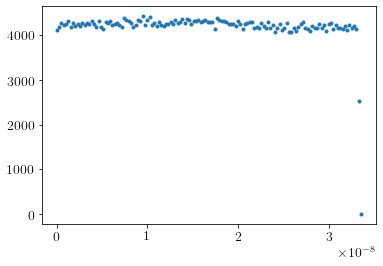

In [7]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure()
plt.plot(t_scale,fotkor_cond[:,0],'.')

Odhad RF frekvence

In [452]:
# odhad periody triggeru
T_trig = ( fotkor_bezcond[fotkor_shape[0]-2, 9] / fotkor_bezcond[fotkor_shape[0]-3, 9] )* t_res + t_scale[fotkor_shape[0]-2]
T_trig_sigma = t_res

# frekvence buzeni pasti

drive_freq = 1/T_trig
drive_freq_sigma = 1/T_trig**2 *T_trig_sigma
Omega = 2*np.pi * drive_freq
Omega_sigma = 2*np.pi * drive_freq_sigma
print(drive_freq)
print(drive_freq_sigma)

# odhad periody triggeru
T_trig_cond = ( fotkor_cond[fotkor_cond_shape[0]-2, 0] / fotkor_cond[fotkor_cond_shape[0]-3, 0] )* t_res_cond + t_scale_cond[fotkor_cond_shape[0]-2]
T_trig_cond_sigma = t_res_cond
# frekvence buzeni pasti

drive_freq_cond = 1/T_trig_cond
drive_freq_cond_sigma = 1/T_trig**2 *T_trig_cond_sigma
Omega_cond = 2*np.pi * drive_freq_cond
Omega_cond_sigma = 2*np.pi * drive_freq_cond_sigma
print(drive_freq_cond)
print(drive_freq_cond_sigma)


30032035.976450287
230892.33533204588
29907562.902327076
230892.33533204588


zkusim data nafitovat maximalizaci likehoodu

In [453]:
# residua vcetne vah
def likehood_transform(x, Omega, S, time_step, sigma):
    # definuju funkci vracejici logaritmus pravdepodobnosti, ze z distrubuce dane sinusovkou, co fituji vyberu pozorovane body
    # predpokladam, ze kazdy bod je normalne rozdelen kolem sinusovky
    
    len_S = len(S)
    #print(len_S)
    S_fit = x[0]*( 1 + x[1] * np.cos( Omega * time_step * np.arange(0, len_S) + x[2] ) )
    
    sum_term = ( (S - S_fit )/sigma )**2
    log_term = np.log( np.ones(len_S) * sigma * np.sqrt(2*np.pi) )
    
    return( 0.5* np.sum( sum_term ) + np.sum(log_term) ) # vraci -log( likehood)

def likehood_transform_jac(x, Omega, S, time_step, sigma):
    # vektor jacob. likehood fce
    len_S = len(S)
    sum_term0 = 2/sigma**2 * (1 + x[1]*np.cos( Omega * time_step * np.arange(0, len_S) + x[2] ) ) *( x[0]*x[1] * np.cos( Omega * time_step * np.arange(0, len_S) + x[2] ) + x[0] - S)
    
    sum_term1 = 2/sigma**2 * x[0]*np.cos( Omega * time_step * np.arange(0, len_S) + x[2] )*( x[0]*x[1] * np.cos( Omega * time_step * np.arange(0, len_S) + x[2] ) + x[0] - S)
        
    sum_term2 = (-2/sigma**2) * x[0] * x[1] * ( x[0] * x[1] * np.cos( Omega * time_step * np.arange(0, len_S) + x[2] ) + x[0] - S)*np.sin( Omega * time_step * np.arange(0, len_S) + x[2] )
        
    return( 0.5 * np.array( [np.sum(sum_term0), np.sum(sum_term1), np.sum(sum_term2)] ) )

def likehood_transform_sigma(x, Omega, S, time_step):
    # definuju funkci vracejici logaritmus pravdepodobnosti, ze z distrubuce dane sinusovkou, co fituji vyberu pozorovane body
    # predpokladam, ze kazdy bod je normalne rozdelen kolem sinusovky
    
    len_S = len(S)
    #print(len_S)
    S_fit = x[0]*( 1 + x[1] * np.cos( Omega * time_step * np.arange(0, len_S) + x[2] ) )
    
    sum_term = ( (S - S_fit )/x[3] )**2
    log_term = np.log( np.ones(len_S) * x[3] * np.sqrt(2*np.pi) )
    
    return( 0.5* np.sum( sum_term ) + np.sum(log_term) ) # vraci -log( likehood)

def fit_func(x, Omega, time_points):
    return x[0] + x[1] * np.cos(Omega * time_points + x[2])

fit dat bez kondiku

In [454]:
fotkor_shape[1]
Omega

188696847.19192117

In [455]:
from scipy.optimize import minimize
# cyklus fitujici vsechny foton-korelacni data

x = np.zeros( (3,fotkor_shape[1]) )
DeltaS_S_ratio = []
sigmas = np.zeros((3,fotkor_shape[1]))
Delta_S_S_ratio_sigma = []
fot_phi = []
fot_phi_sigma = []

hist_sigma = 86 # sigma binu jednotlivych fotkor-signalu

for i in range(fotkor_shape[1]):
    
    ##############------------- cast kodu maximalizujici likehood
    # -----
    #podminky urcujici prijimuti reseni
    max_phi_unc = 0.3
    phi0 = 1.1
    
    #--- zde budu zkouset postupne ruzne pocatecni body tak, aby minimalizace vybrala globalni minimum
    x0 = [fotkor_bezcond[:fotkor_shape[0]-2,i].mean(), 0.5* ( fotkor_bezcond[:fotkor_shape[0]-2,i].max()
    -fotkor_bezcond[:fotkor_shape[0]-2,i].min() )/fotkor_bezcond[:fotkor_shape[0]-2,i].mean(), phi0]
#     x0 = [fotkor[:fotkor_shape[0]-2,i].mean(), 0.5* ( fotkor[:fotkor_shape[0]-2,i].max()
#         -fotkor[:fotkor_shape[0]-2,i].min() )/fotkor[:fotkor_shape[0]-2,i].mean(), phi0, 100]
#     fit = minimize(likehood_transform, x0, args=(Omega, fotkor[:fotkor_shape[0]-2,i], t_res, hist_sigma[i] ), tol=1e-10 )
    fit = minimize(likehood_transform, x0, args=(Omega, fotkor_bezcond[:fotkor_shape[0]-2,i], t_res, hist_sigma ), tol=1e-10,
                  jac=likehood_transform_jac)
#     fit = minimize(likehood_transform_sigma, x0, args=(Omega, fotkor[:fotkor_shape[0]-2,i], t_res), tol=1e-10)
#     print(fit)
#     print('\n')
    if ( np.sqrt(fit.hess_inv[2,2]) > max_phi_unc ) or (fit.x[1] < 0):
        x0 = [fotkor_bezcond[:fotkor_shape[0]-2,i].mean(), 0.5* ( fotkor_bezcond[:fotkor_shape[0]-2,i].max()
        -fotkor_bezcond[:fotkor_shape[0]-2,i].min() )/fotkor_bezcond[:fotkor_shape[0]-2,i].mean(), -phi0]
#         x0 = [fotkor[:fotkor_shape[0]-2,i].mean(), 0.5* ( fotkor[:fotkor_shape[0]-2,i].max()
#             -fotkor[:fotkor_shape[0]-2,i].min() )/fotkor[:fotkor_shape[0]-2,i].mean(), -phi0, 100]
        fit = minimize(likehood_transform, x0, args=(Omega, fotkor_bezcond[:fotkor_shape[0]-2,i], t_res, hist_sigma ), tol=1e-10 ,
                      jac=likehood_transform_jac)
#         fit = minimize(likehood_transform_sigma, x0, args=(Omega, fotkor[:fotkor_shape[0]-2,i], t_res), tol=1e-10)
#         print(fit)
#         print('\n')
    
    
    #---- odhad nejistot parametru----
#     C = fit.hess_inv  # variancni-kovariancni matice
    C = fit.hess_inv
    #------------------------------- 
    x[:,i] = fit.x
    sigmas[:,i] = np.sqrt( np.diagonal(C) )
    DeltaS_S_ratio.append(x[1,i]  )
    
    #---- faze fot-kor signalu
    fot_phi.append( np.angle(DeltaS_S_ratio[i]*np.exp(1j*x[2,i])) )
    
    #---- sigma delta s ku s
    Delta_S_S_ratio_sigma.append(np.sqrt( C[1,1]) )
    
    #---- sigma fot_phi
    fot_phi_sigma.append(np.sqrt(C[2,2]))
    
    
S_0 = x[0,:]  # parametry S_0
DeltaS = x[1,:] * S_0 # delta S

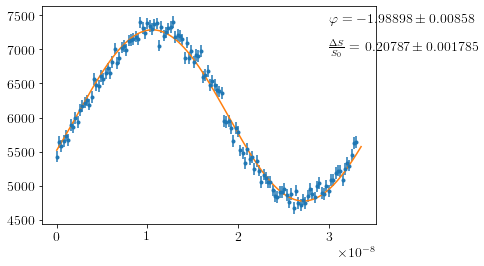

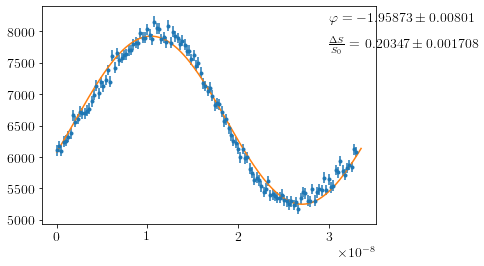

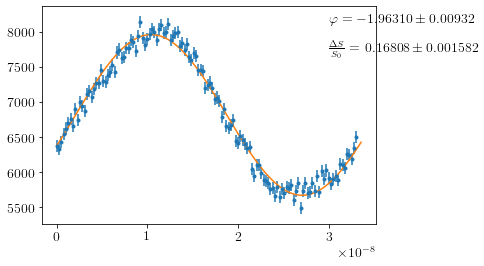

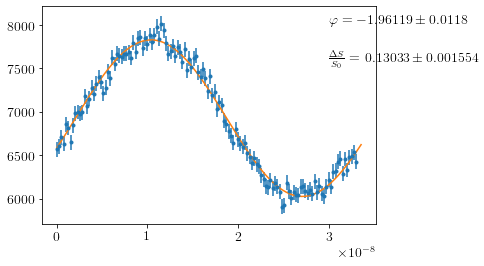

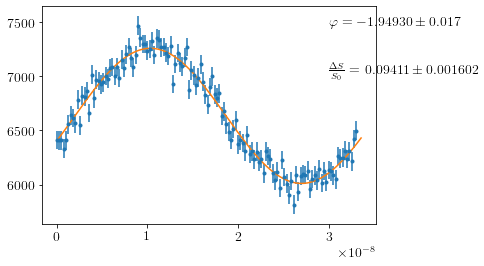

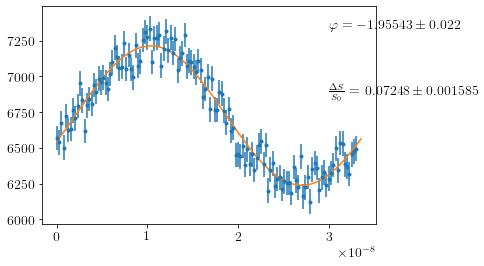

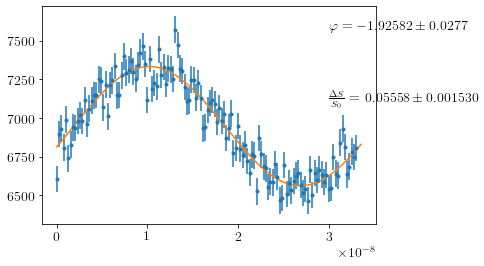

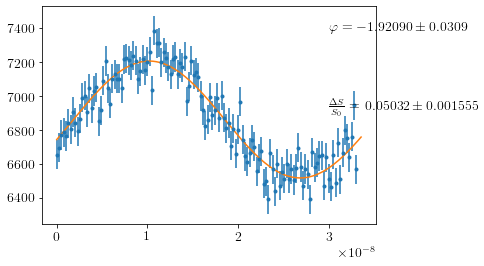

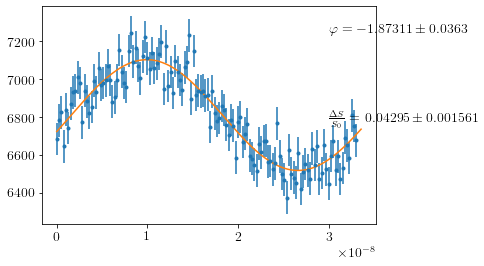

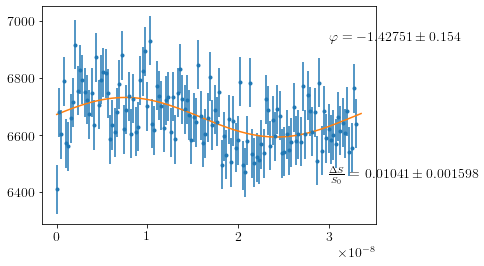

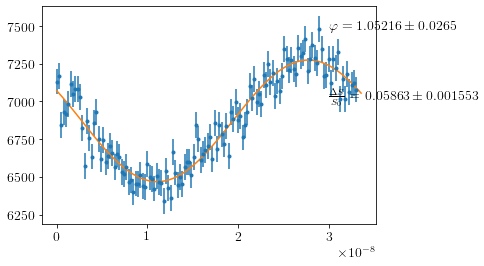

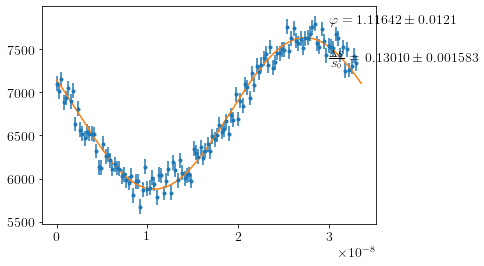

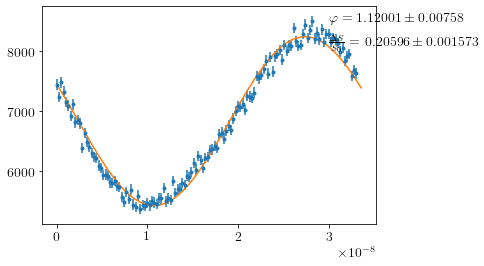

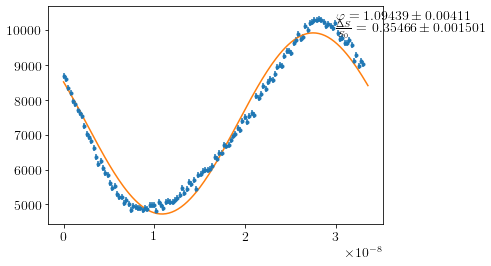

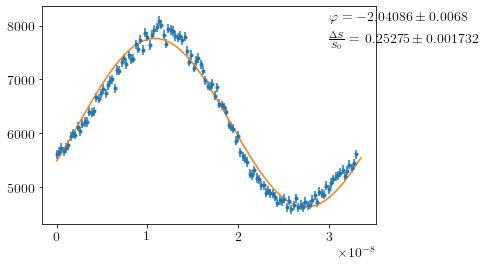

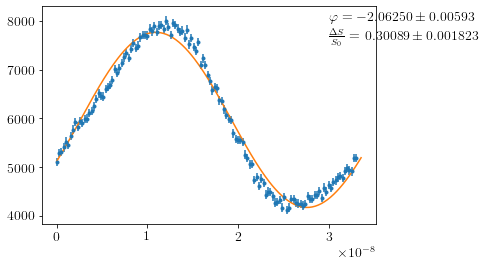

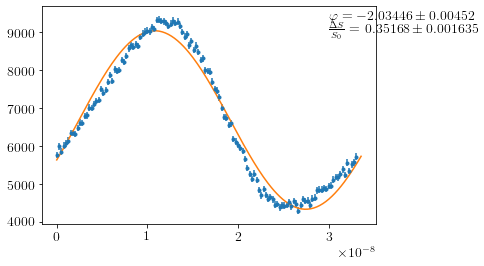

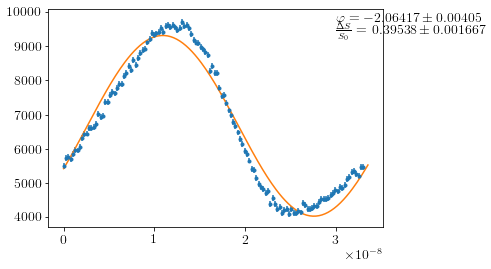

In [12]:
time_fit = np.linspace(0, t_scale.max(), 200)

for i in range(fotkor_shape[1]):
    
    fotkor_fit = fit_func( [S_0[i],DeltaS[i],x[2,i]], Omega, time_fit)
    
    plt.figure()
    plt.errorbar(t_scale[:fotkor_shape[0]-2],fotkor_bezcond[:fotkor_shape[0]-2,i],yerr=hist_sigma,fmt='.')
    plt.plot(time_fit, fotkor_fit)
    text = r'$\frac{\Delta S}{S_0}  = \,\,$' + r'${:.5f} \pm {:.6f}$'.format(DeltaS_S_ratio[i], Delta_S_S_ratio_sigma[i])
    plt.text(3e-8, fotkor_bezcond[:,i].max()-500,text) 
    text2 = r'$\varphi  = {:.5f} \pm {:.3}$'.format(fot_phi[i], sigmas[2,i])
    plt.text(3e-8, fotkor_bezcond[:,i].max(),text2) 

fitovani dat s kondenzatory

In [456]:
from scipy.optimize import minimize
# cyklus fitujici vsechny foton-korelacni data

x_cond = np.zeros( (3,fotkor_cond_shape[1]) )
DeltaS_S_ratio_cond = []
sigmas_cond = np.zeros((3,fotkor_cond_shape[1]))
Delta_S_S_ratio_cond_sigma = []
fot_phi_cond = []
fot_phi_cond_sigma = []

hist_sigma = 100 # sigma binu jednotlivych fotkor-signalu

for i in range(fotkor_cond_shape[1]):
    
    ##############------------- cast kodu maximalizujici likehood
    # -----
    #podminky urcujici prijimuti reseni
    max_phi_unc = 0.5
    phi0 = 1.9
    
    #--- zde budu zkouset postupne ruzne pocatecni body tak, aby minimalizace vybrala globalni minimum
    x0 = [fotkor_cond[:fotkor_cond_shape[0]-2,i].mean(), 0.5* ( fotkor_cond[:fotkor_cond_shape[0]-2,i].max()
    -fotkor_cond[:fotkor_cond_shape[0]-2,i].min() )/fotkor_cond[:fotkor_cond_shape[0]-2,i].mean(), phi0]
#     x0 = [fotkor[:fotkor_shape[0]-2,i].mean(), 0.5* ( fotkor[:fotkor_shape[0]-2,i].max()
#         -fotkor[:fotkor_shape[0]-2,i].min() )/fotkor[:fotkor_shape[0]-2,i].mean(), phi0, 100]
#     fit = minimize(likehood_transform, x0, args=(Omega, fotkor[:fotkor_shape[0]-2,i], t_res, hist_sigma[i] ), tol=1e-10 )
    fit = minimize(likehood_transform, x0, args=(Omega, fotkor_cond[:fotkor_cond_shape[0]-2,i], t_res_cond, hist_sigma ), tol=1e-10,
                  jac=likehood_transform_jac)
#     fit = minimize(likehood_transform_sigma, x0, args=(Omega, fotkor[:fotkor_shape[0]-2,i], t_res), tol=1e-10)
#     print(fit)
#     print('\n')
    if ( np.sqrt(fit.hess_inv[2,2]) > max_phi_unc ) or (fit.x[1] < 0):
        x0 = [fotkor_cond[:fotkor_cond_shape[0]-2,i].mean(), 0.5* ( fotkor_cond[:fotkor_cond_shape[0]-2,i].max()
        -fotkor_cond[:fotkor_cond_shape[0]-2,i].min() )/fotkor_cond[:fotkor_cond_shape[0]-2,i].mean(), -phi0]
#         x0 = [fotkor[:fotkor_shape[0]-2,i].mean(), 0.5* ( fotkor[:fotkor_shape[0]-2,i].max()
#             -fotkor[:fotkor_shape[0]-2,i].min() )/fotkor[:fotkor_shape[0]-2,i].mean(), -phi0, 100]
        fit = minimize(likehood_transform, x0, args=(Omega, fotkor_cond[:fotkor_cond_shape[0]-2,i], t_res_cond, hist_sigma ), tol=1e-10 ,
                      jac=likehood_transform_jac)
#         fit = minimize(likehood_transform_sigma, x0, args=(Omega, fotkor[:fotkor_shape[0]-2,i], t_res), tol=1e-10)
#         print(fit)
#         print('\n')
    
    
    #---- odhad nejistot parametru----
#     C = fit.hess_inv  # variancni-kovariancni matice
    C = fit.hess_inv
    #------------------------------- 
    x_cond[:,i] = fit.x
    sigmas_cond[:,i] = np.sqrt( np.diagonal(C) )
    DeltaS_S_ratio_cond.append(x_cond[1,i]  )
    
    #---- faze fot-kor signalu
    fot_phi_cond.append( np.angle(DeltaS_S_ratio_cond[i]*np.exp(1j*x_cond[2,i])) )
    
    #---- sigma delta s ku s
    Delta_S_S_ratio_cond_sigma.append(np.sqrt( C[1,1]) )
    
    #---- sigma fot_phi
    fot_phi_cond_sigma.append(np.sqrt(C[2,2]))
    
    
S_0_cond = x_cond[0,:]  # parametry S_0
DeltaS_cond = x_cond[1,:] * S_0_cond # delta S

In [457]:
DeltaS_S_ratio_cond

[0.01568087249555328,
 0.60160984571555,
 0.2856928580646388,
 0.16634680203853291,
 0.04390966125810643,
 0.5007577495984523,
 0.35682015488008223,
 0.21445072501844784,
 0.1596003587232352,
 0.09419524448297986]

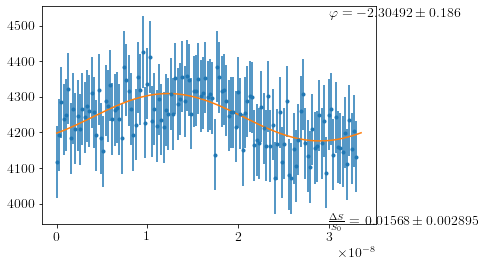

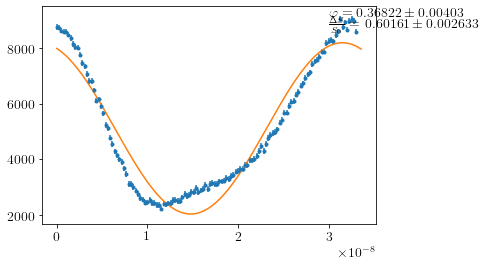

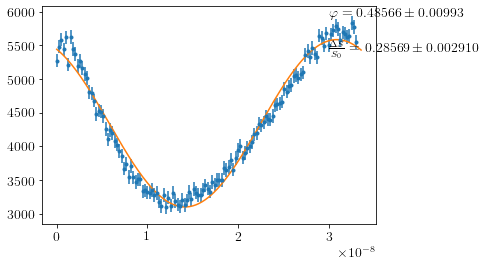

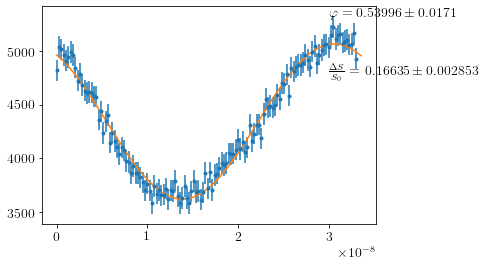

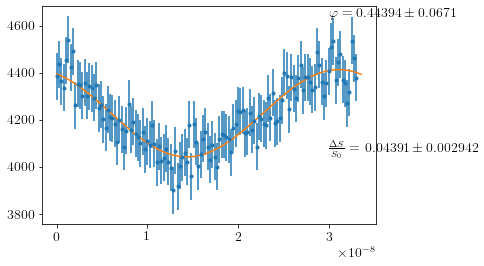

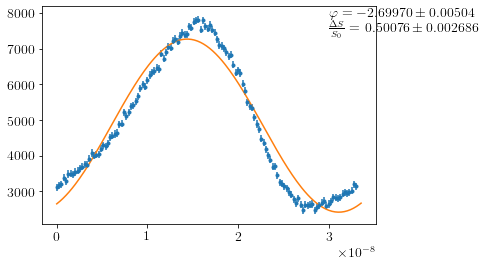

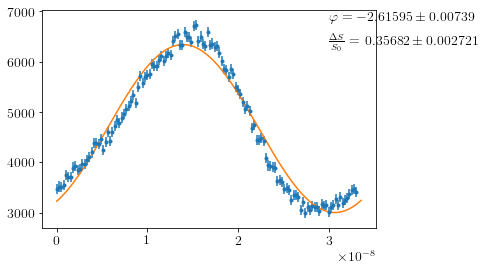

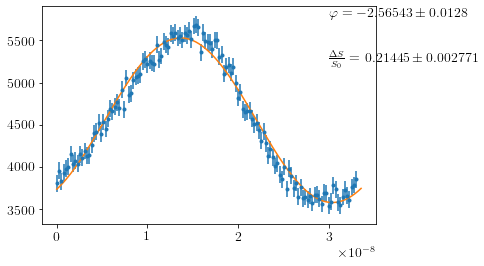

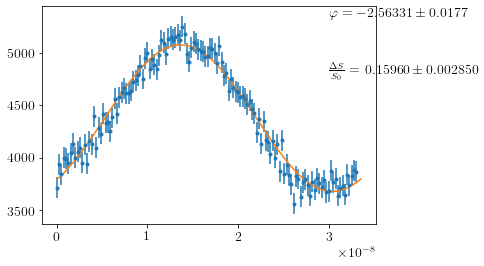

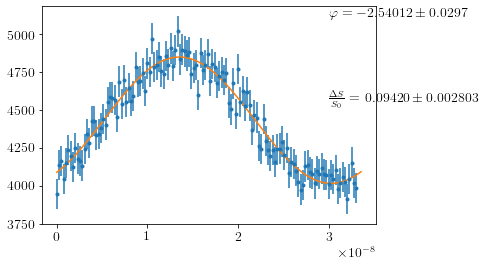

In [15]:
time_fit = np.linspace(0, t_scale_cond.max(), 200)

for i in range(fotkor_cond_shape[1]):
    
    fotkor_fit = fit_func( [S_0_cond[i],DeltaS_cond[i],x_cond[2,i]], Omega_cond, time_fit)
    
    plt.figure()
    plt.errorbar(t_scale_cond[:fotkor_cond_shape[0]-2],fotkor_cond[:fotkor_cond_shape[0]-2,i],yerr=hist_sigma,fmt='.')
    plt.plot(time_fit, fotkor_fit)
    text = r'$\frac{\Delta S}{S_0}  = \,\,$' + r'${:.5f} \pm {:.6f}$'.format(DeltaS_S_ratio_cond[i], Delta_S_S_ratio_cond_sigma[i])
    plt.text(3e-8, fotkor_cond[:,i].max()-500,text) 
    text2 = r'$\varphi  = {:.5f} \pm {:.3}$'.format(fot_phi_cond[i], sigmas_cond[2,i])
    plt.text(3e-8, fotkor_cond[:,i].max()+100,text2) 

vypada ok

vykreslim zavislost $\Delta S / S_0 $ na parametru $\nu$

In [458]:
# 
delta_U = voltages_bezcond[:,0] - voltages_bezcond[:,1]
delta_U_cond = voltages_cond[:,0] - voltages_cond[:,1]

nu_bezcond = delta_U / (voltages_bezcond[:,0] + voltages_bezcond[:,1])
nu_cond = delta_U_cond / (voltages_cond[:,0] + voltages_cond[:,1])

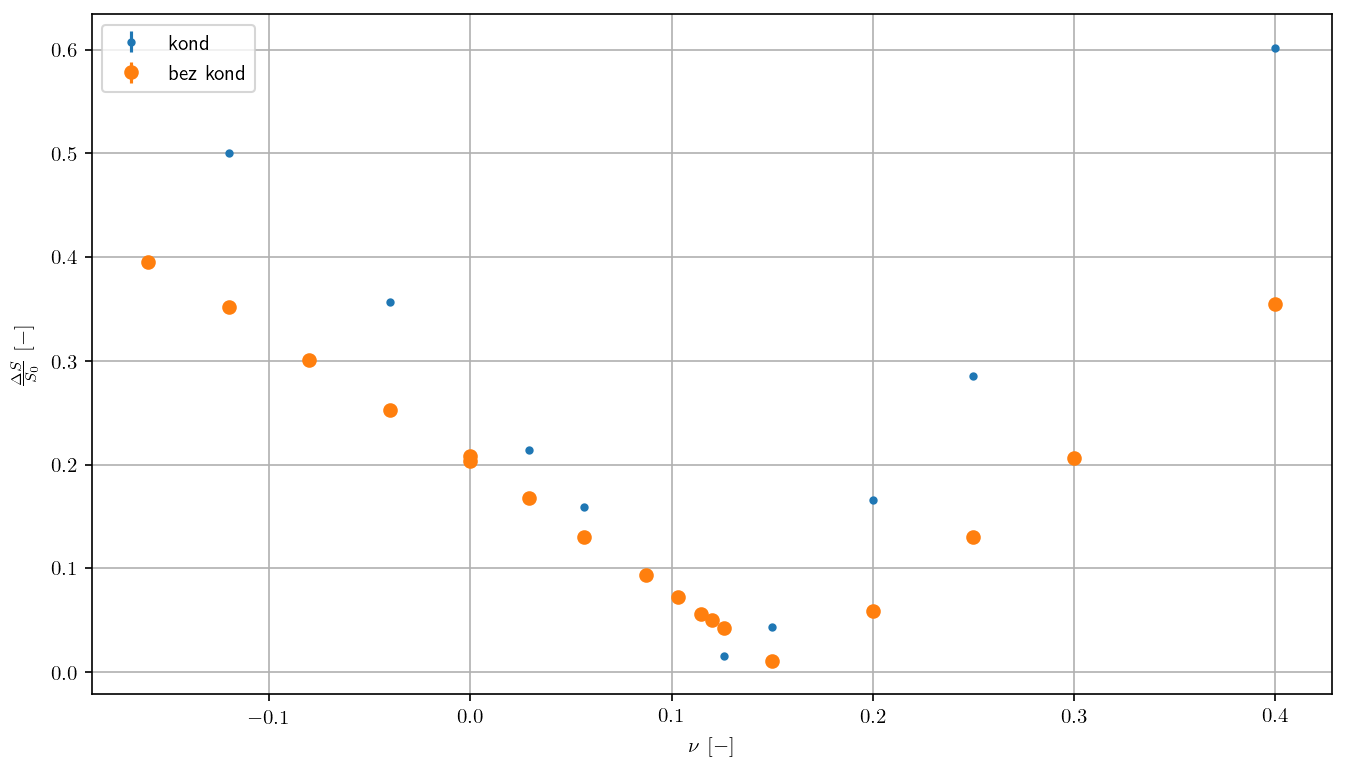

In [388]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu_cond, DeltaS_S_ratio_cond, yerr=Delta_S_S_ratio_cond_sigma, fmt='.', label=r'kond')
plt.errorbar(nu_bezcond, DeltaS_S_ratio, yerr=Delta_S_S_ratio_sigma,  fmt='o', label=r'bez kond')


plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ \frac{\Delta S}{S_0} \, \, \rm [-]$")

plt.legend()
plt.grid()

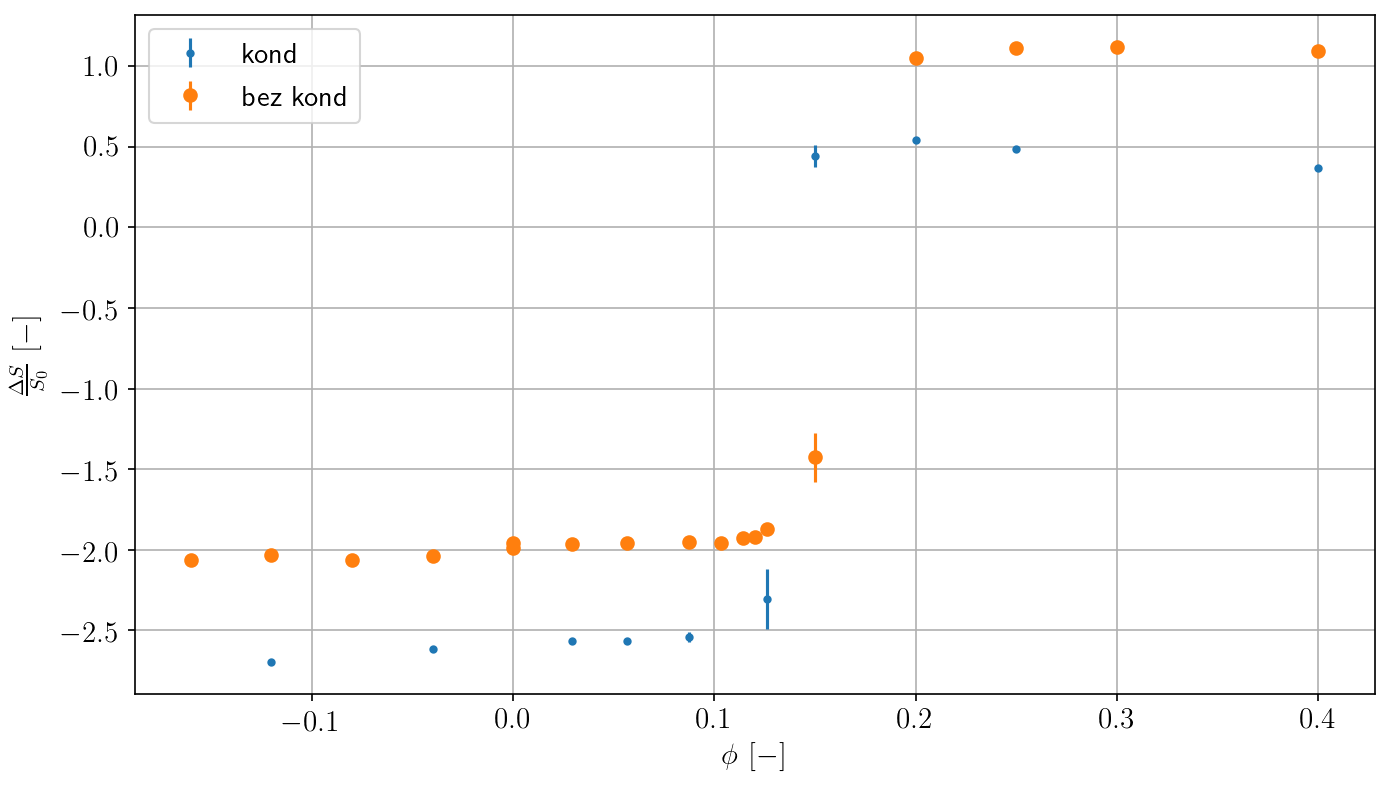

In [18]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu_cond, fot_phi_cond, yerr=fot_phi_cond_sigma, fmt='.', label=r'kond')
plt.errorbar(nu_bezcond, fot_phi, yerr=fot_phi_sigma,  fmt='o', label=r'bez kond')


plt.xlabel(r"$ \phi \, \, \rm [-]$")
plt.ylabel(r"$ \frac{\Delta S}{S_0} \, \, \rm [-]$")

plt.legend()
plt.grid()

Nyni prepocitam tyto amplitudy modulace na modulacni indexy

In [459]:
# parametry vypoctu beta
decay_rate = 2*np.pi * 21.008e6  # decay rate dle tabulek NISTu
laser_detun = -30e6 * 2*np.pi  # detuning 
laser_detun_sigma = 5e6 * 2*np.pi # sigma detun

In [460]:
# numericke reseni deltaS/S -> beta

from scipy.optimize import fsolve
from scipy.special import j0, j1

def get_A(decay_rate, detun):
    # returns driven oscillator amplitude in point given by detun param.
    return 1 / 2 * (decay_rate / 2 - detun * 1j) / (detun ** 2 + (decay_rate / 2) ** 2)

def fl_signal(beta, laser_detun, Omega, decay_rate):
    # function calculates deltaS/S0 photon-correlation signal
    # input: beta, laser detuning, RF drive freq, decay rate
    A_minus = get_A(decay_rate, laser_detun - Omega)
    A_plus = get_A(decay_rate, laser_detun + Omega)
    A = get_A(decay_rate, laser_detun)

    numer = 2 * j0(beta) * j1(beta) * np.abs(np.conj(A) * A_plus - A * np.conj(A_minus))
    denom = j0(beta) ** 2 * np.abs(A) ** 2 + j1(beta) ** 2 * (np.abs(A_plus) ** 2 + np.abs(A_minus) ** 2)

    return numer / denom

def get_beta(Omega, decay_rate, laser_detun, norm_mod_amp):
    # function calculates the corresponding beta for given known parameters
    # input: drive frequency, decay_rate, laser detuning, normalized modulation amplitude given by ph_corr_signal
    # output: float value of beta
    def root_func(beta, laser_detun, Omega, decay_rate, norm_mod_amp):
        return fl_signal(beta, laser_detun, Omega, decay_rate) - norm_mod_amp

    sol = fsolve(root_func, np.array([0.01]), args=(laser_detun, Omega, decay_rate, norm_mod_amp), full_output=1)
    return float(sol[0])

In [461]:
from scipy.optimize import approx_fprime, check_grad

def root_func(x):
    [beta, norm_mod_amp, Omega, laser_detun, decay_rate] = x
    return fl_signal(beta, laser_detun, Omega, decay_rate) - norm_mod_amp

def root_func_grad(x):
#     [beta, norm_mod_amp, Omega, laser_detun, decay_rate] = x
    epsilon = 5e-6
    return( approx_fprime(x, root_func, x*epsilon ) )

In [462]:
from scipy.optimize import approx_fprime, check_grad

# get beta bezcond
beta = np.zeros(fotkor_shape[1])
beta_sigma = np.zeros(fotkor_shape[1])
for k in range(fotkor_shape[1]):
    beta[k] = get_beta(Omega, decay_rate, laser_detun, DeltaS_S_ratio[k])
    
    # get sigma beta
    jacob_F = root_func_grad( np.array([beta[k], DeltaS_S_ratio[k], Omega, laser_detun, decay_rate]) ) 
    # [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]
    
    # variance-cov parametru
    Sigma_param = np.diag([Delta_S_S_ratio_sigma[k]**2, Omega_sigma**2, laser_detun_sigma**2])
    
    beta_sigma[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )
    

In [463]:
from scipy.optimize import approx_fprime, check_grad

# get beta cond
beta_cond = np.zeros(fotkor_cond_shape[1])
beta_cond_sigma = np.zeros(fotkor_cond_shape[1])
for k in range(fotkor_cond_shape[1]):
    beta_cond[k] = get_beta(Omega_cond, decay_rate, laser_detun, DeltaS_S_ratio_cond[k])
    
    # get sigma beta
    jacob_F = root_func_grad( np.array([beta_cond[k], DeltaS_S_ratio_cond[k], Omega_cond, laser_detun, decay_rate]) ) 
    # [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]
    
    # variance-cov parametru
    Sigma_param = np.diag([Delta_S_S_ratio_cond_sigma[k]**2, Omega_cond_sigma**2, laser_detun_sigma**2])
    
    beta_cond_sigma[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )
    

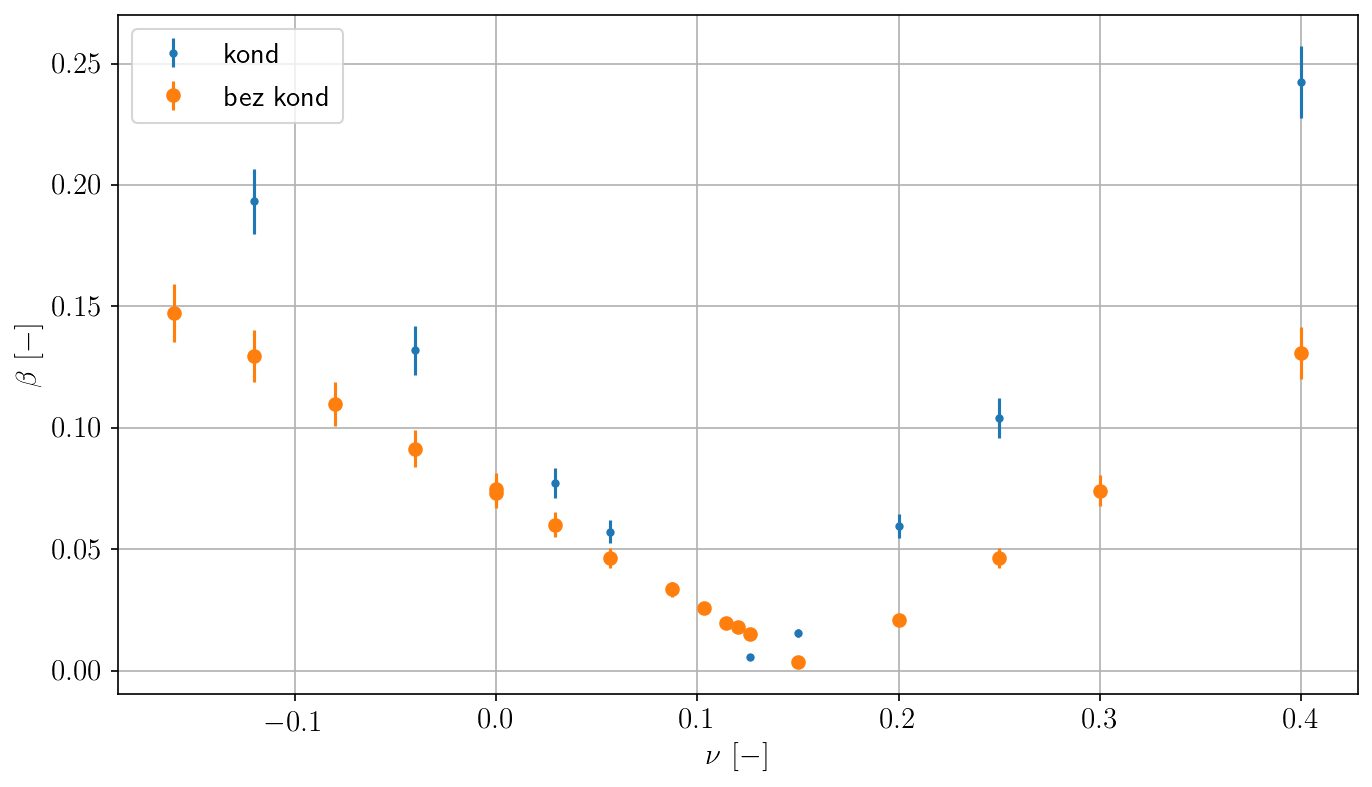

In [200]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu_cond, beta_cond, yerr=beta_cond_sigma, fmt='.', label=r'kond')
plt.errorbar(nu_bezcond, beta, yerr=beta_sigma,  fmt='o', label=r'bez kond')


plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ \beta \, \, \rm [-]$")

plt.legend()
plt.grid()

prepocet na el. pole

In [464]:
# dalsi parametry
m = 40 * 1.66053904e-27 # calcium mass
k_vec = 2*np.pi * 1/(397e-9) # wave vector
e = 1.60217662e-19 # elem charge

In [465]:
# bezcond
# get E-fields
E_rf = (m*Omega**2 / (k_vec*e)) * beta
E_rf_sigma = np.sqrt( (beta_sigma*m*Omega**2 / (k_vec*e))**2 + (2*m*Omega / (k_vec*e) * beta * Omega_sigma)**2  ) # propagase chyb

# cond
# get E-fields
E_rf_cond = (m*Omega_cond**2 / (k_vec*e)) * beta_cond
E_rf_cond_sigma = np.sqrt( (beta_cond_sigma*m*Omega_cond**2 / (k_vec*e))**2 + (2*m*Omega_cond / (k_vec*e) * beta_cond * Omega_cond_sigma)**2  ) # propagase chyb

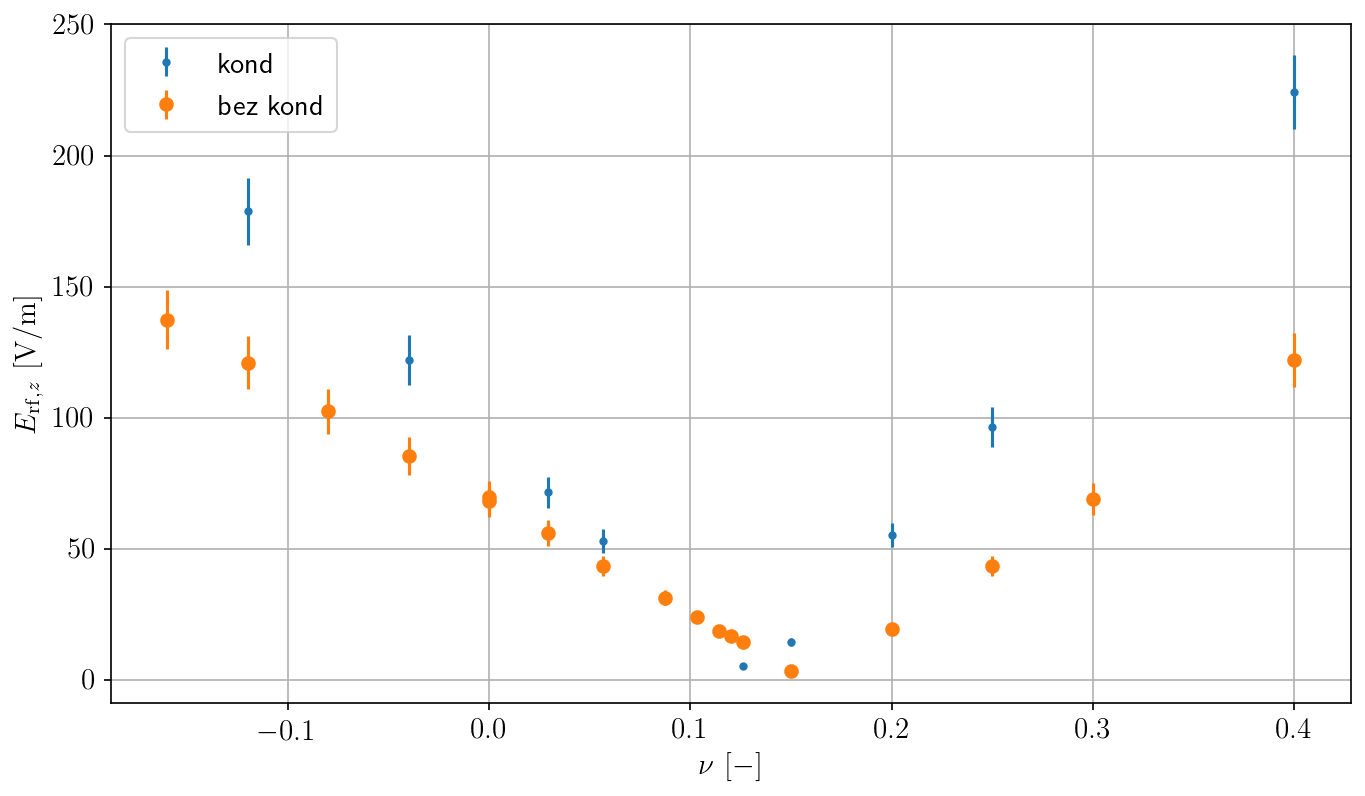

In [27]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu_cond, E_rf_cond, yerr=E_rf_cond_sigma, fmt='.', label=r'kond')
plt.errorbar(nu_bezcond, E_rf, yerr=E_rf_sigma,  fmt='o', label=r'bez kond')


plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

plt.legend()
plt.grid()

## Nejprve zkusim natvrdo nafitovat model na namerene data pro mereni s kondikama

importuju model

In [466]:
## nacteni dat ze souboru
# pole generovano axialni elektrodou v + 2.25mm
z_data = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,1]
E_field_ax_data = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,2]
E_field_rad_data_par = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,3]
E_field_rad_data_jedna = E_field_rad_data_par/2 # pole generovane jednou radialni elektrodou na ose z je polovicni oproti poli
# E_field_rad_data_jedna = E_field_rad_data_par         # ve vypoctu se mi nekde objevil faktor 4                                      
    
leng_data = len(z_data)

In [397]:
z_data

array([-0.99998, -0.99994, -0.9999 , ...,  0.9999 ,  0.99994,  0.99998])

In [467]:
from scipy import interpolate

# definice interpolacnich fci
E_field_ax_6 = interpolate.interp1d(z_data*1e3, E_field_ax_data, kind='quadratic')
E_field_ax_5 = interpolate.interp1d(z_data*1e3, -1*E_field_ax_data[::-1], kind='quadratic')
E_field_rad_jedna = interpolate.interp1d(z_data*1e3, E_field_rad_data_jedna, kind='quadratic')

In [399]:
# funkce vracejici amplitudu rf pole v zavislosti na z a na ostatnich parametrech
def E_rf_asym_amp(Vrf, phi, delta_z_ax, z, f_interp):
    # Vrf = [Vrf_1, Vrf_3, Vrf_5, Vrf_6] # defaultne mam Vrf24 = 0 => asym drive
    # phi = [phi_1 = 0, phi_2, phi_56]  # phi_1 = 0 -- volba, dale pak phi_5=phi_6
    # delta_z_ax - [vychyleni ax_5, vychyleni ax_6]
    # z = [] body, ve kterych chci fci vyhodnotit
    # f_interp = (E_field_rad, E_field_ax5, E_field_ax6) 
    
    # out: amplituda E_pole
    
    rad_amp = sum( Vrf[0:2] * np.exp(phi[0:2] * 1j ) )
    ax_5_amp = Vrf[2] * np.exp(phi[2] * 1j )
    ax_6_amp = Vrf[3] * np.exp(phi[2] * 1j )
    
    E_rf_complex = rad_amp * f_interp[0](z) + ax_5_amp * f_interp[1](z - delta_z_ax[0]) + ax_6_amp * f_interp[2](z - delta_z_ax[1])

    # amplituda a faze
    return np.abs(E_rf_complex)

-28.328328328328325


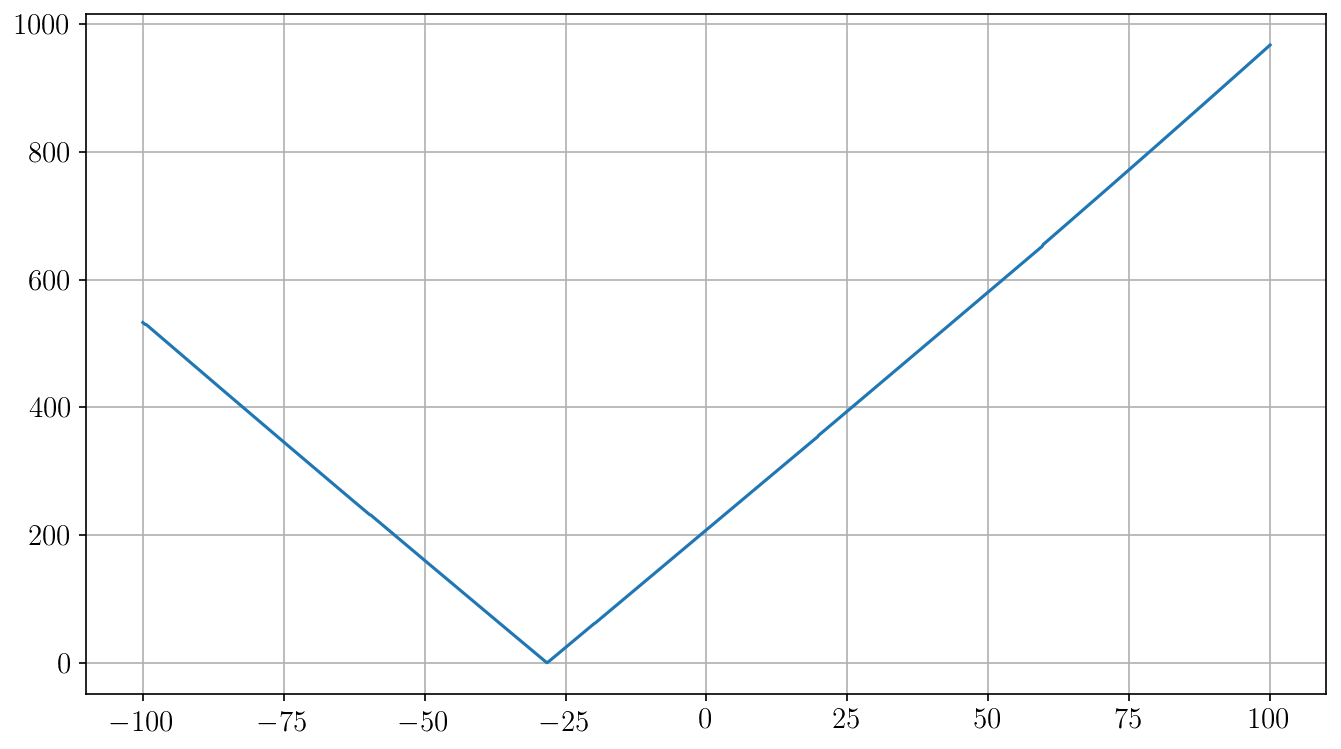

In [32]:
# napeti a faze na elektrodach pasti
Vrf_1 = 800
Vrf_3 = 550
Vrf_5 = 50
Vrf_6 = 0
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = 0

phi = np.array( [0, phi_2, phi_56] )

delta_z_ax = [0, 0]

z_range = np.linspace(-100, 100, 1000)
E_rf_amp = E_rf_asym_amp(Vrf, phi, delta_z_ax,z_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
z_min_EMM = z_range[ np.argmin(E_rf_amp) ]
print(z_min_EMM)

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
# plt.plot(z_data*1e3, E_rf_amp)
plt.plot(z_range, E_rf_amp)
plt.grid()

funkce pocitajici amplitudu EMM funguje

definuju fci, ktera mi bude pocitat residua modelu a namerenych dat, pricemz vzdy $\nu$ z dat preskaluju na $z$

In [468]:
### prepocet nu na z funkce:
def get_z_given_nu(nu, delta_z_ax):
    # funkce vraci axialni polohu iontu 
    # input: nu, [delta_z_ax_5, delta_z_ax_6]
    a = 0.000357087248516796 *1e6
    b = 0.0000614272209845667 *1e6
    c = 0.000214572720416111 *1e6
    
    return( a* nu + b* nu**3 + c *nu**5 + sum(delta_z_ax) * 0.5 )
    

In [34]:
get_z_given_nu(np.array([0.12,0.11]), [-40,-40])

array([ 2.96195532, -0.63518732])

In [35]:
E_rf_asym_amp([800, 550, 50, 0], np.array([0,0,0]), [0,0], np.array([0,-28.3]), (E_field_rad_jedna , E_field_ax_5, E_field_ax_6))

array([2.08453683e+02, 1.25469698e-01])

In [401]:
def axi_EMM_model_fit_resid(x, nu, E_rf_measure, f_interp):
    # funkce vraci residua
    # x = [Vrf_asym, delta_z_ax[0], delta_z_ax[1] ]
    
    # fixni parametry
    Vrf_5 = 31.5
    Vrf_6 = 31.5
    phi_2 = 0.1
    phi_56 = 0.1

    phi = np.array( [0, phi_2, phi_56] )
    
    delta_z_ax = [x[1], x[2]]
    #----- prepocet nu z experimentu na z
    z_experiment = get_z_given_nu(nu, delta_z_ax)
    
    return(E_rf_measure - E_rf_asym_amp([x[0], x[0], Vrf_5, Vrf_6], phi, delta_z_ax, z_experiment, f_interp) )
    

In [37]:
E_rf_asym_amp([550, 550, 31.5, 31.5], np.array([0,0.1,0.1]), [0,0], get_z_given_nu(np.array([0,0.1]),[0,0]), 
              (E_field_rad_jedna , E_field_ax_5, E_field_ax_6))

array([  0.23733568, 206.4228089 ])

In [38]:
axi_EMM_model_fit_resid([550, 0,0], np.array([0,0.1]), [0, 200], 
                       (E_field_rad_jedna , E_field_ax_5, E_field_ax_6))

array([-0.23733568, -6.4228089 ])

In [39]:
axi_EMM_model_fit_resid(np.array( [500, -40, -40] ), nu_cond, E_rf_cond, (E_field_rad_jedna , E_field_ax_5, E_field_ax_6))

array([   1.54841367, -316.13997627, -134.04369155,  -80.27757008,
        -26.93558699, -284.59211648, -189.29396796, -110.88480233,
        -79.02770855,  -43.75417031])

jdu fitovat

In [40]:
from scipy.optimize import least_squares

x0 = np.array( [700,10, 0] )
fit = least_squares(axi_EMM_model_fit_resid,x0, args=(nu_cond, E_rf_cond, (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) , ftol=1e-10, xtol=1e-10)
fit

ValueError: A value in x_new is below the interpolation range.

zkusim jiny pristup, definuju funkci, ktera mi vrati amplitudu pole v zavislosti na $\nu$ misto z

In [469]:
# funkce vracejici amplitudu rf pole v zavislosti na nu a na ostatnich parametrech
def E_rf_asym_amp_nu(Vrf, phi, delta_z_ax, nu, f_interp):
    # Vrf = [Vrf_1, Vrf_3, Vrf_5, Vrf_6] # defaultne mam Vrf24 = 0 => asym drive
    # phi = [phi_1 = 0, phi_2, phi_56]  # phi_1 = 0 -- volba, dale pak phi_5=phi_6
    # delta_z_ax - [vychyleni ax_5, vychyleni ax_6]
    # nu = [] body, ve kterych chci fci vyhodnotit
    # f_interp = (E_field_rad, E_field_ax5, E_field_ax6) 
    
    # out: amplituda E_pole
    
    rad_amp = sum( Vrf[0:2] * np.exp(phi[0:2] * 1j ) )
    ax_5_amp = Vrf[2] * np.exp(phi[2] * 1j )
    ax_6_amp = Vrf[3] * np.exp(phi[2] * 1j )
    
    z = get_z_given_nu(nu, delta_z_ax)
    E_rf_complex = rad_amp * f_interp[0](z) + ax_5_amp * f_interp[1](z - delta_z_ax[0]) + ax_6_amp * f_interp[2](z - delta_z_ax[1])

    # amplituda a faze
    return np.abs(E_rf_complex)

In [470]:
# funkce vracejici fazi rf pole v zavislosti na nu a na ostatnich parametrech
def E_rf_asym_phase_nu(Vrf, phi, delta_z_ax, nu, f_interp):
    # Vrf = [Vrf_1, Vrf_3, Vrf_5, Vrf_6] # defaultne mam Vrf24 = 0 => asym drive
    # phi = [phi_1 = 0, phi_2, phi_56]  # phi_1 = 0 -- volba, dale pak phi_5=phi_6
    # delta_z_ax - [vychyleni ax_5, vychyleni ax_6]
    # nu = [] body, ve kterych chci fci vyhodnotit
    # f_interp = (E_field_rad, E_field_ax5, E_field_ax6) 
    
    # out: amplituda E_pole
    
    rad_amp = sum( Vrf[0:2] * np.exp(phi[0:2] * 1j ) )
    ax_5_amp = Vrf[2] * np.exp(phi[2] * 1j )
    ax_6_amp = Vrf[3] * np.exp(phi[2] * 1j )
    
    z = get_z_given_nu(nu, delta_z_ax)
    E_rf_complex = rad_amp * f_interp[0](z) + ax_5_amp * f_interp[1](z - delta_z_ax[0]) + ax_6_amp * f_interp[2](z - delta_z_ax[1])

    # amplituda a faze
    return np.angle( E_rf_complex )

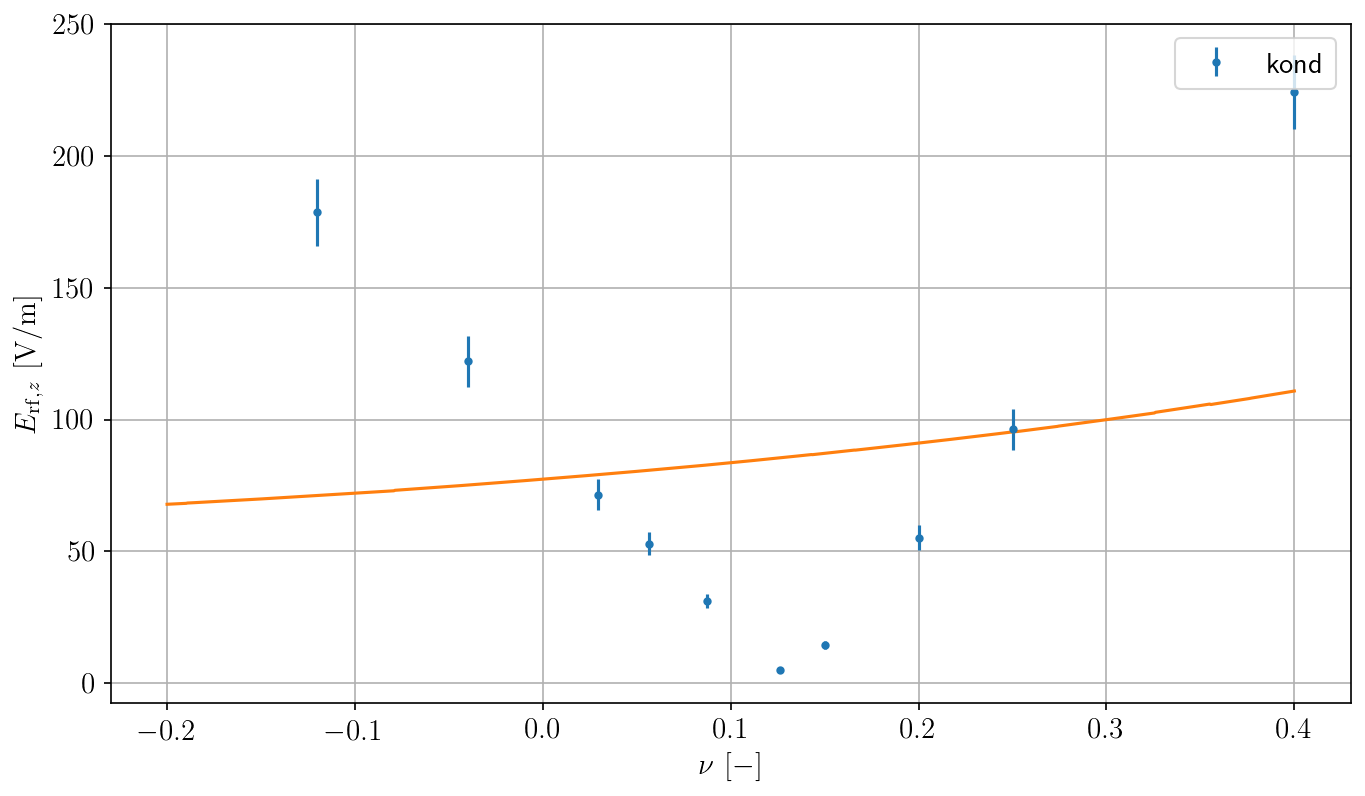

In [44]:
# napeti a faze na elektrodach pasti
Vrf_1 = 73.54872052
Vrf_3 = 73.54872052
Vrf_5 = 31.5
Vrf_6 = 31.5
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = 0.1

phi = np.array( [0, phi_2, phi_56] )

delta_z_ax = [175.87364292/2, 175.87364292/2]

nu_range = np.linspace(-0.2, 0.4, 1000)
E_rf_amp = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )


my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu_cond, E_rf_cond, yerr=E_rf_cond_sigma, fmt='.', label=r'kond')
# plt.errorbar(nu_bezcond, E_rf, yerr=E_rf_sigma,  fmt='o', label=r'bez kond')
plt.plot(nu_range, E_rf_amp)

plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

plt.legend()
plt.grid()

zkusim to nafitovat

In [410]:
def fit_resid_E_amp(x, nu_data, E_amp_data):
    # x = [Vrf_asym, delta_x_ax_sum ]
    
    # fixni parametry
#     Vrf_5 = 31.5
#     Vrf_6 = 31.5
    Vrf_5 = x[2]
    Vrf_6 = x[2]
    
    Vrf = [x[0], x[0], Vrf_5, Vrf_6]
    
    phi_2 = 0
    phi_56 = 0.1

    phi = np.array( [0, phi_2, phi_56] )
    
    delta_z_ax = [x[1]/2, x[1]/2]
    
    
    return( E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data )

# def fit_resid_E_amp(x, nu_data, E_amp_data):
#     # x = [Vrf_asym, delta_x_ax_sum ]
    
#     # fixni parametry
#     Vrf_5 = 31.5 * x[2]
#     Vrf_6 = 31.5 * x[2]
    
#     Vrf = [x[0], x[0], Vrf_5, Vrf_6]
    
#     phi_2 = 0
#     phi_56 = 0.1

#     phi = np.array( [0, phi_2, phi_56] )
    
#     delta_z_ax = [x[1], x[1]]
    
    
#     return( E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data )

In [411]:
from scipy.optimize import least_squares

x0 = np.array( [300, -10, 0.9] )
fit = least_squares(fit_resid_E_amp,x0, args=(nu_cond, E_rf_cond) , ftol=1e-10, xtol=1e-10)
fit

 active_mask: array([0., 0., 0.])
        cost: 46.07124928573017
         fun: array([-0.58745566, -4.31234013, -1.12286065,  1.70686251,  5.26956126,
        5.19923644,  0.86177313, -0.20287778, -2.07500707, -3.02276682])
        grad: array([-6.12455490e-06,  8.81385094e-06, -1.39682412e-05])
         jac: array([[ 0.03064058,  0.26632311, -0.08011806],
       [ 1.4309943 ,  1.6375004 , -3.5930955 ],
       [ 0.71211232,  1.55692478, -2.1256615 ],
       [ 0.49081548,  1.5244047 , -1.67174759],
       [ 0.26885061,  1.48066201, -1.18685627],
       [ 0.87232262, -1.58080302, -1.01055219],
       [ 0.52787595, -1.55313104, -0.33540924],
       [ 0.23497892, -1.53900643,  0.24482845],
       [ 0.11820477, -1.53907552,  0.47784739],
       [-0.01213407, -1.52619585,  0.73989923]])
     message: '`ftol` termination condition is satisfied.'
        nfev: 36
        njev: 23
  optimality: 1.396824120014628e-05
      status: 2
     success: True
           x: array([259.73762037, -60.4960

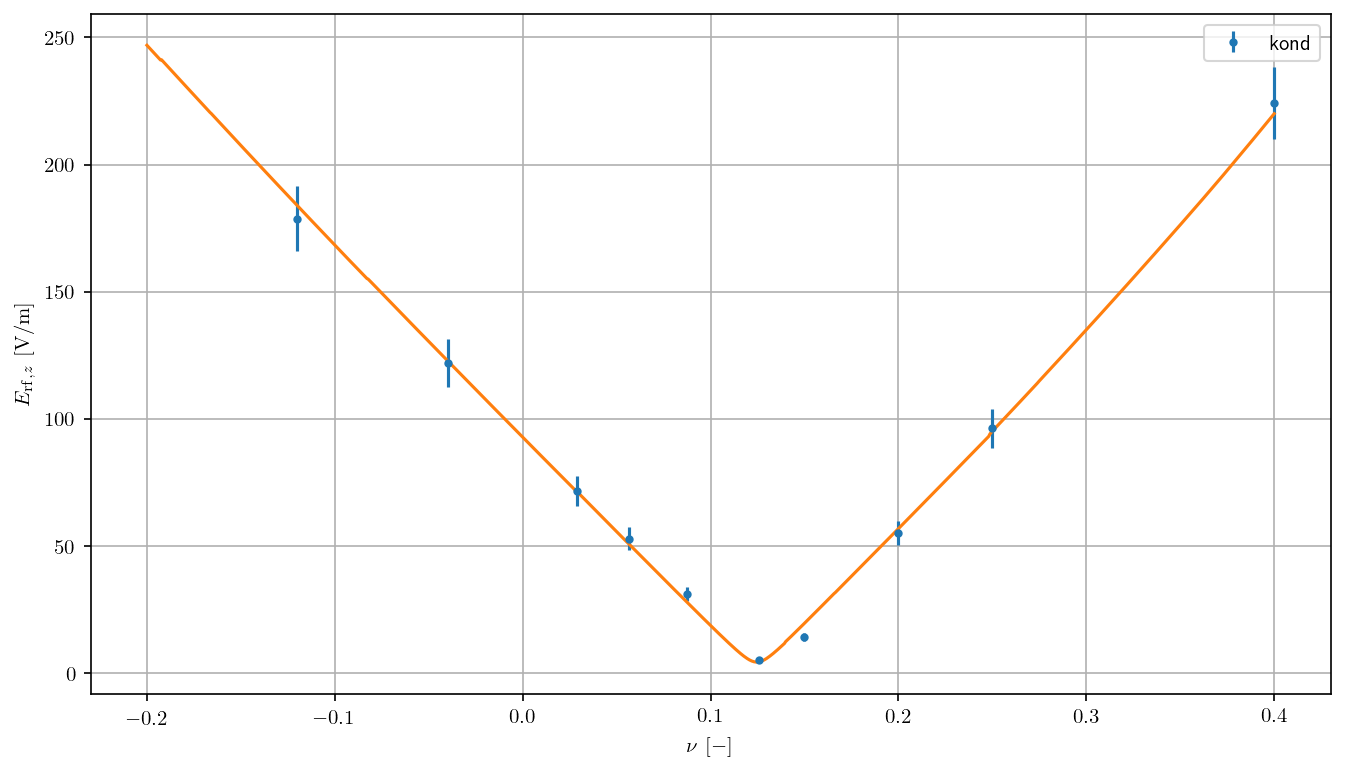

In [412]:
# napeti a faze na elektrodach pasti
Vrf_1 = fit.x[0]
Vrf_3 = fit.x[0]
Vrf_5 = fit.x[2] 
Vrf_6 = fit.x[2]
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = 0.1

phi = np.array( [0, phi_2, phi_56] )

delta_z_ax = [fit.x[1]/2, fit.x[1]/2]
# delta_z_ax = [fit.x[1], fit.x[1]]

nu_range = np.linspace(-0.2, 0.4, 1000)
E_rf_amp = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )


my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu_cond, E_rf_cond, yerr=E_rf_cond_sigma, fmt='.', label=r'kond')
# plt.errorbar(nu_bezcond, E_rf, yerr=E_rf_sigma,  fmt='o', label=r'bez kond')
plt.plot(nu_range, E_rf_amp)

plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

plt.legend()
plt.grid()

zkusim nafitovat data i s condikem i bez kondiku

Nejprve plot:

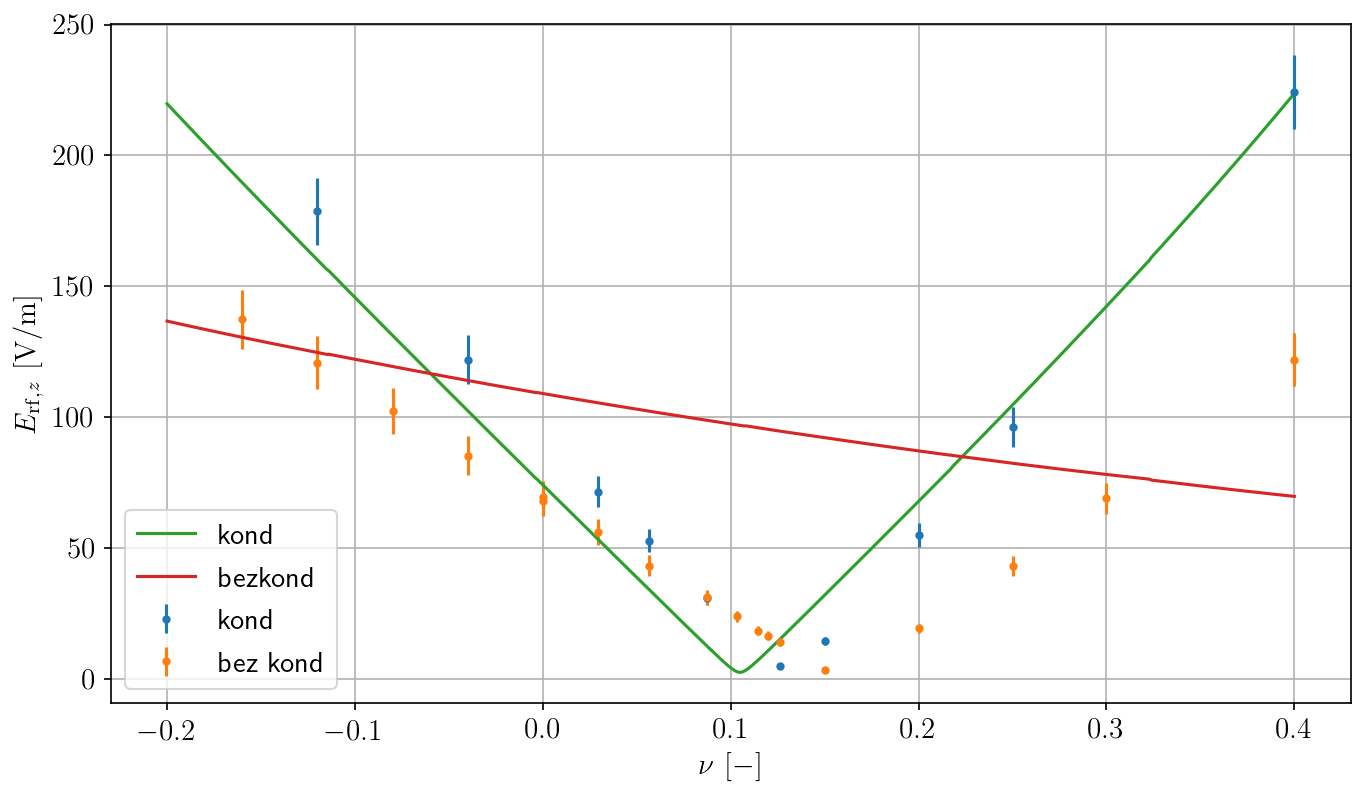

In [48]:
# napeti a faze na elektrodach pasti kond
Vrf_1 = -106.58624168
Vrf_3 = Vrf_1
Vrf_5 = 31.5
Vrf_6 = 31.5
Vrf_cond = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = 0.1

phi_cond = np.array( [0, phi_2, phi_56] )

delta_z_ax = [-77.11034241, -40]
exper_data_scale = 1

nu_range = np.linspace(-0.2, 0.4, 1000)
E_rf_amp_cond = E_rf_asym_amp_nu(Vrf_cond, phi_cond, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )

# pro pripad bez kondiku
# napeti a faze na elektrodach pasti kond
Vrf_1 = 114.33851327
Vrf_3 = Vrf_1
Vrf_5 = 42.5
Vrf_6 = 50
Vrf_bezcond = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = 0.1

phi_bezcond = np.array( [0, phi_2, phi_56] )



nu_range = np.linspace(-0.2, 0.4, 1000)
E_rf_amp_bezcond = E_rf_asym_amp_nu(Vrf_bezcond, phi_bezcond, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )


my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu_cond, exper_data_scale*E_rf_cond, yerr=E_rf_cond_sigma, fmt='.', label=r'kond')
plt.errorbar(nu_bezcond, exper_data_scale*E_rf, yerr=E_rf_sigma,  fmt='.', label=r'bez kond')
plt.plot(nu_range, E_rf_amp_cond, label=r'kond')
plt.plot(nu_range, E_rf_amp_bezcond, label=r'bezkond')

plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

plt.legend()
plt.grid()

zkusim to nafitovat

In [475]:
# def fit_resid_E_amp_cond_bezcond(x, nu_data_cond, nu_data_bezcond, E_amp_data_cond, E_amp_data_bezcond):
#     # x = [Vrf_asym_cond, Vrf_asym_bezcond, delta_ax_sum , scale]
    
#     # fixni parametry
#     Vrf_5 = 31.5
#     Vrf_6 = 31.5
    
#     Vrf_cond = [x[0], x[0], Vrf_5, Vrf_6]
    
#     Vrf_5 = 42.5
#     Vrf_6 = 50.0
#     Vrf_bezcond = [x[1], x[1], Vrf_5, Vrf_6]
    
    
#     phi_2 = 0
#     phi_56 = 0.1

# #     phi_2 = x[5]
# #     phi_56 = x[4]

#     phi = np.array( [0, phi_2, phi_56] )
    
#     delta_z_ax = [ x[2]/2, x[2]/2 ]
    
#     resid_cond = E_rf_asym_amp_nu(Vrf_cond, phi, delta_z_ax, nu_data_cond, (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - x[3]*E_amp_data_cond
#     resid_bezcond = E_rf_asym_amp_nu(Vrf_bezcond, phi, delta_z_ax, nu_data_bezcond, (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - x[3]*E_amp_data_bezcond
    
    
#     return( np.concatenate((resid_cond, resid_bezcond)) )

def fit_resid_E_amp_cond_bezcond(x, nu_data_cond, nu_data_bezcond, E_amp_data_cond, E_amp_data_bezcond):
    # x = [Vrf_asym_cond, Vrf_asym_bezcond, delta_ax_sum , scale]
    
    # fixni parametry
    Vrf_5 = 31.5 *x[3]
    Vrf_6 = 31.5 *x[3]
    
    Vrf_cond = [x[0], x[0], Vrf_5, Vrf_6]
    
    Vrf_5 = 42.5 *x[3]
    Vrf_6 = 50 *x[3]
    Vrf_bezcond = [x[1], x[1], Vrf_5, Vrf_6]
    
    
    phi_2 = 0
    phi_56 = 0.1

#     phi_2 = x[5]
#     phi_56 = x[4]

    phi = np.array( [0, phi_2, phi_56] )
    
    delta_z_ax = [ x[2]/2, x[2]/2 ]
#     delta_z_ax = [-40.18434164, -40.18434164]
    
    resid_cond = E_rf_asym_amp_nu(Vrf_cond, phi, delta_z_ax, nu_data_cond, (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_cond
    resid_bezcond = E_rf_asym_amp_nu(Vrf_bezcond, phi, delta_z_ax, nu_data_bezcond, (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data_bezcond
    
    
    return( np.concatenate((resid_cond, resid_bezcond)) )

In [478]:
from scipy.optimize import least_squares

# x0 = np.array( [200, 200, -200, 80, 0.1, 0.1] )
# x0 = np.array( [700, 500, -200, 1] )
# x0 = np.array( [700, 500, -200] )
# x0 = np.array( [700, 500] )
# x0 = np.array( [600, 500, -40, 0.9] )
x0 = np.array( [700, 500, -200, 0.5] )

# bbounds = ([150,150,-200, 1, 0, 0],[1000,1000,200, 100, 2*np.pi, 2*np.pi] )
# bbounds = ([300,300,-200, 0.1],[800,800,200, 100] )
# bbounds = ([180,180,-200],[800,800,200] )
# bbounds = ([180,100],[800,800] )
# bbounds = ([180,150,-200, 0.8],[800,800,200, 5] )
bbounds = ([180,100,-200, 0.1],[800,800,200, 10] )


# fit = least_squares(fit_resid_E_amp_cond_bezcond, x0, args=(nu_cond, nu_bezcond, E_rf_cond, E_rf) , ftol=1e-10, xtol=1e-10)
fit = least_squares(fit_resid_E_amp_cond_bezcond, x0, args=(nu_cond, nu_bezcond, E_rf_cond, E_rf) , ftol=1e-10, xtol=1e-10,
                   bounds=bbounds)
# fit.x
fit

 active_mask: array([0, 0, 0, 0])
        cost: 86.94141146636325
         fun: array([-3.56143326, -3.82782773, -0.7923692 ,  2.07043893,  4.91756525,
        5.06032546,  0.55863506, -0.80750438, -2.63715763, -3.65586825,
       -1.69589158, -0.18694064, -1.08168745, -0.49414187, -1.93864533,
       -1.84371691, -1.0737188 , -1.78164336, -1.96717009, -0.94138993,
        1.67866795,  0.38971775, -1.83127285, -4.65866119,  0.68834457,
        1.65977493,  1.63551562,  4.00783051])
        grad: array([ 7.40594023e-07,  1.13460409e-07,  1.91936402e-05, -6.66319021e-04])
         jac: array([[ 4.15001568e-02,  0.00000000e+00,  9.89509837e-01,
        -2.80231816e+01],
       [ 1.29706619e+00,  0.00000000e+00,  1.18350315e+00,
        -1.14120567e+02],
       [ 5.83812599e-01,  0.00000000e+00,  1.12167360e+00,
        -6.78072481e+01],
       [ 3.65283029e-01,  0.00000000e+00,  1.12304510e+00,
        -5.36553035e+01],
       [ 1.49089672e-01,  0.00000000e+00,  1.11683840e+00,
        -3

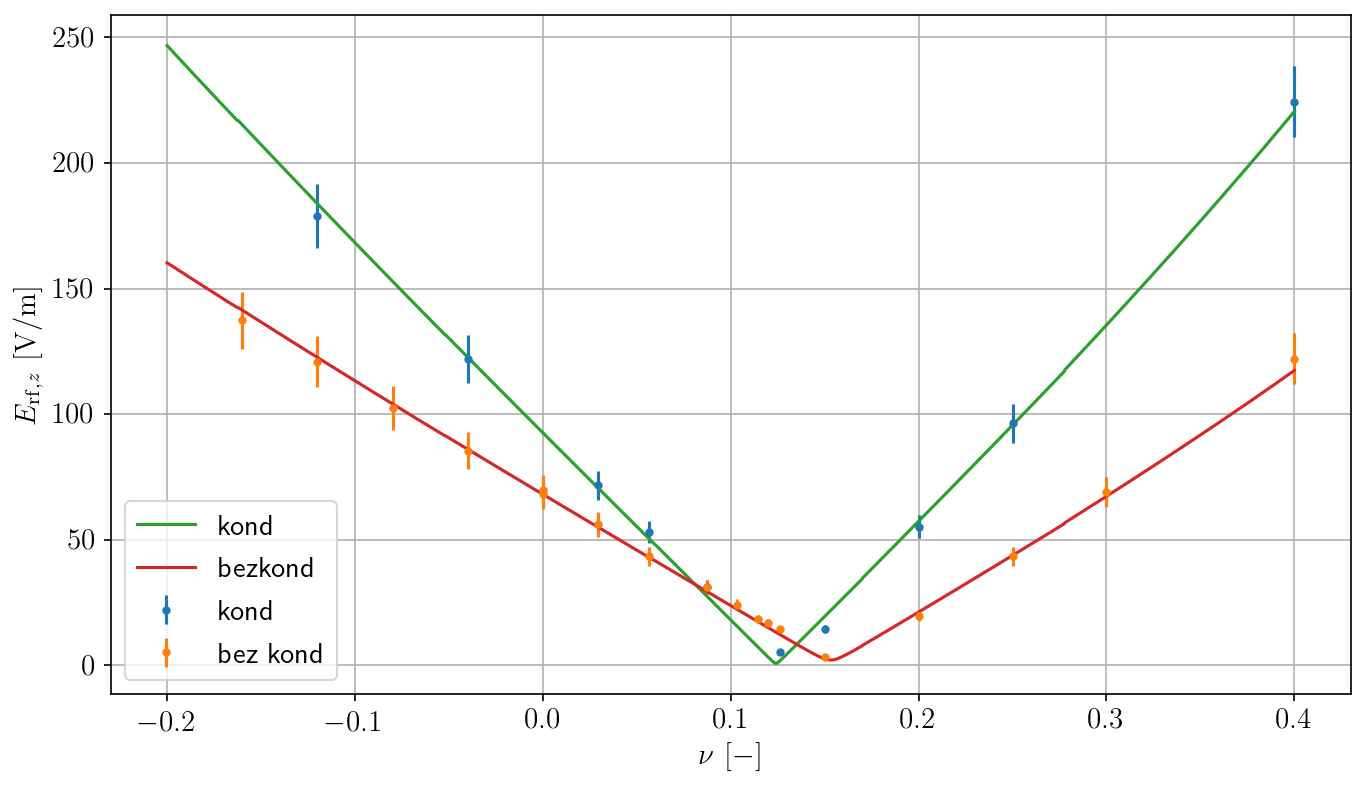

In [479]:
# napeti a faze na elektrodach pasti kond
Vrf_1 = fit.x[0]
Vrf_3 = Vrf_1
# Vrf_5 = 31.5 
# Vrf_6 = 31.5 
Vrf_5 = 31.5 * fit.x[3]
Vrf_6 = 31.5 * fit.x[3]
# Vrf_5 = 31.5 *1.35
# Vrf_6 = 31.5 *1.35
Vrf_cond = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = 0.1

phi_cond = np.array( [0, phi_2, phi_56] )

delta_z_ax = [fit.x[2]/2, fit.x[2]/2]
# delta_z_ax = [-30.18434164, -30.18434164]
# exper_data_scale = fit.x[3]
exper_data_scale = 1

nu_range = np.linspace(-0.2, 0.4, 2000)
E_rf_amp_cond = E_rf_asym_amp_nu(Vrf_cond, phi_cond, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )

# pro pripad bez kondiku
# napeti a faze na elektrodach pasti kond
Vrf_1 = fit.x[1]
Vrf_3 = Vrf_1
# Vrf_5 = 42.5 
# Vrf_6 = 50 
Vrf_5 = 42.5 * fit.x[3]
Vrf_6 = 50.0 * fit.x[3]
Vrf_bezcond = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = 0.1

phi_bezcond = np.array( [0, phi_2, phi_56] )



# nu_range = np.linspace(-0.2, 0.4, 2000)
E_rf_amp_bezcond = E_rf_asym_amp_nu(Vrf_bezcond, phi_bezcond, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )


my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
# plt.errorbar(nu_cond, exper_data_scale*E_rf_cond, yerr=exper_data_scale*E_rf_cond_sigma, fmt='.', label=r'kond')
# plt.errorbar(nu_bezcond, exper_data_scale*E_rf, yerr=exper_data_scale*E_rf_sigma,  fmt='.', label=r'bez kond')
plt.errorbar(nu_cond, E_rf_cond, yerr=E_rf_cond_sigma, fmt='.', label=r'kond')
plt.errorbar(nu_bezcond, exper_data_scale*E_rf, yerr=exper_data_scale*E_rf_sigma,  fmt='.', label=r'bez kond')
plt.plot(nu_range, E_rf_amp_cond, label=r'kond')
plt.plot(nu_range, E_rf_amp_bezcond, label=r'bezkond')

plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

plt.legend()
plt.grid()

prepocitam $\nu$ zpet na $z$ a vyplotim

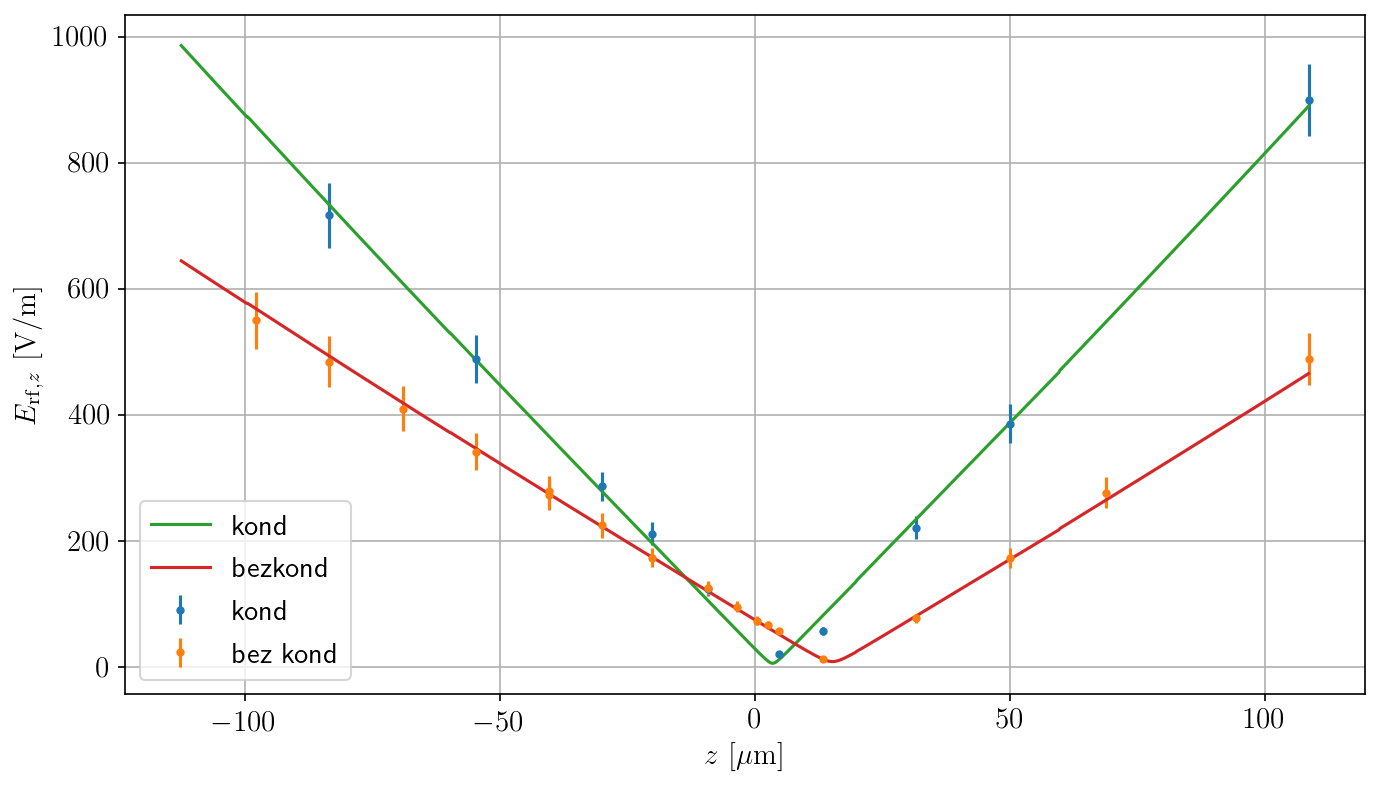

In [52]:
## get z range 
z_range = get_z_given_nu(nu_range, [fit.x[2]/2, fit.x[2]/2])

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)



plt.errorbar(get_z_given_nu(nu_cond, [fit.x[2]/2, fit.x[2]/2]), exper_data_scale*E_rf_cond, yerr=exper_data_scale*E_rf_cond_sigma, fmt='.', label=r'kond')
plt.errorbar(get_z_given_nu(nu_bezcond, [fit.x[2]/2, fit.x[2]/2]), exper_data_scale*E_rf, yerr=exper_data_scale*E_rf_sigma,  fmt='.', label=r'bez kond')
plt.plot(z_range, E_rf_amp_cond, label=r'kond')
plt.plot(z_range, E_rf_amp_bezcond, label=r'bezkond')

# plt.axvline(get_z_given_nu(0, [fit.x[2]/2, fit.x[2]/2]), linestyle='--')



plt.xlabel(r"$ z \, \, \rm [\mu m]$")
plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

plt.legend()
plt.grid()

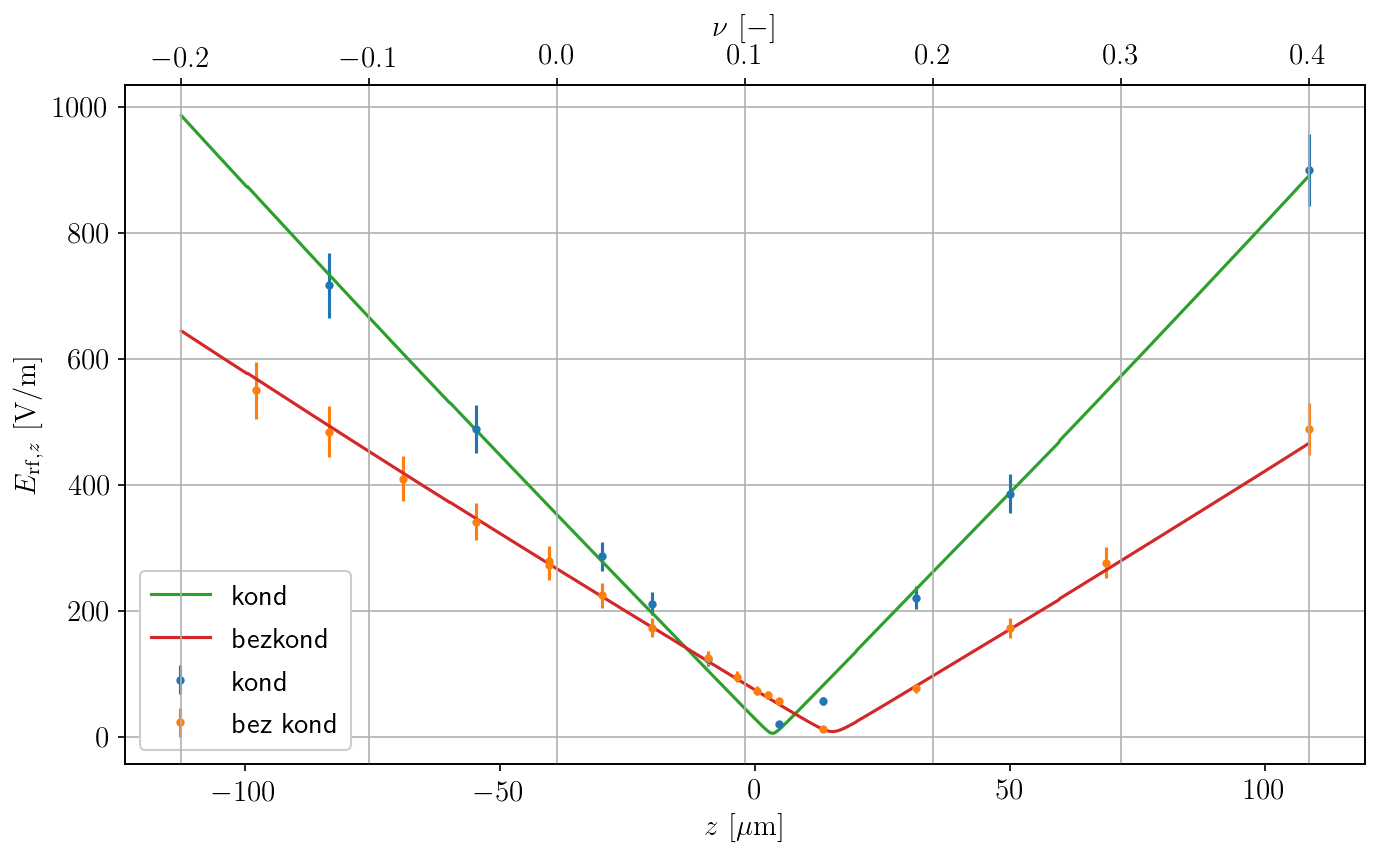

In [53]:
## get z range 
z_range = get_z_given_nu(nu_range, [fit.x[2]/2, fit.x[2]/2])

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x = plt.gca()

x.errorbar(get_z_given_nu(nu_cond, [fit.x[2]/2, fit.x[2]/2]), exper_data_scale*E_rf_cond, yerr=exper_data_scale*E_rf_cond_sigma, fmt='.', label=r'kond')
x.errorbar(get_z_given_nu(nu_bezcond, [fit.x[2]/2, fit.x[2]/2]), exper_data_scale*E_rf, yerr=exper_data_scale*E_rf_sigma,  fmt='.', label=r'bez kond')
x.plot(z_range, E_rf_amp_cond, label=r'kond')
x.plot(z_range, E_rf_amp_bezcond, label=r'bezkond')

# plt.axvline(get_z_given_nu(0, [fit.x[2]/2, fit.x[2]/2]), linestyle='--')

x2 = x.twiny()
invisibleline = x2.plot(nu_range, E_rf_amp_cond, alpha=0)

x2.set_xlabel(r"$ \nu \, \, \rm [-]$")
x.set_xlabel(r"$ z \, \, \rm [\mu m]$")
x.set_ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

x.legend(framealpha=1)
x.grid(axis='y')
x2.grid()

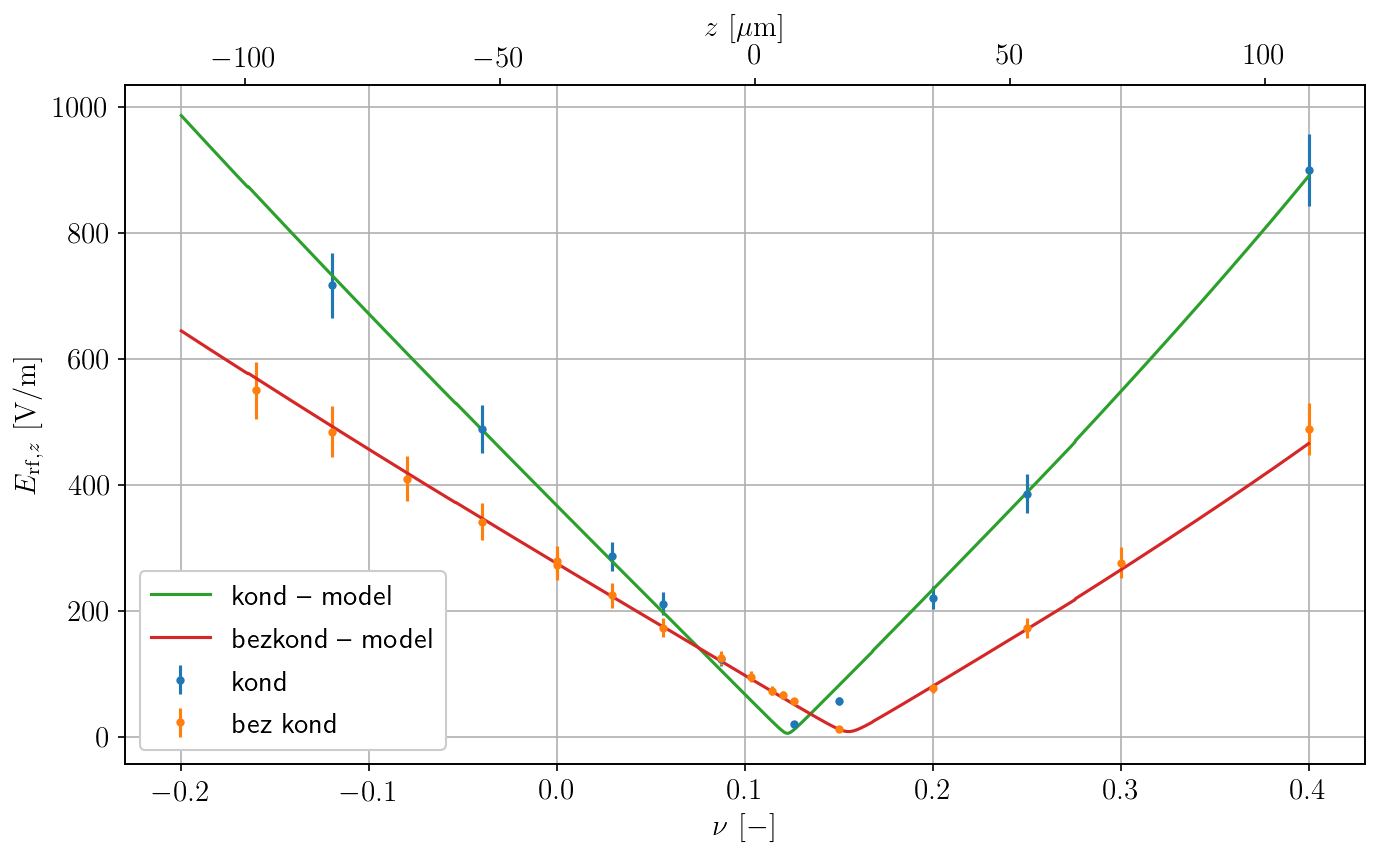

In [54]:
## get z range 
z_range = get_z_given_nu(nu_range, [fit.x[2]/2, fit.x[2]/2])

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x = plt.gca()

x.errorbar(nu_cond, exper_data_scale*E_rf_cond, yerr=exper_data_scale*E_rf_cond_sigma, fmt='.', label=r'kond')
x.errorbar(nu_bezcond, exper_data_scale*E_rf, yerr=exper_data_scale*E_rf_sigma,  fmt='.', label=r'bez kond')
x.plot(nu_range, E_rf_amp_cond, label=r'kond -- model')
x.plot(nu_range, E_rf_amp_bezcond, label=r'bezkond -- model')

# plt.axvline(get_z_given_nu(0, [fit.x[2]/2, fit.x[2]/2]), linestyle='--')

x2 = x.twiny()
invisibleline = x2.plot(z_range, E_rf_amp_cond, alpha=0)

x2.set_xlabel(r"$ z \, \, \rm [\mu m]$")
x.set_xlabel(r"$ \nu \, \, \rm [-]$")
x.set_ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

x.legend(framealpha=1)
x.grid()
# x2.grid()

# save
# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/axial_MM_fit.png", bbox_inches="tight")

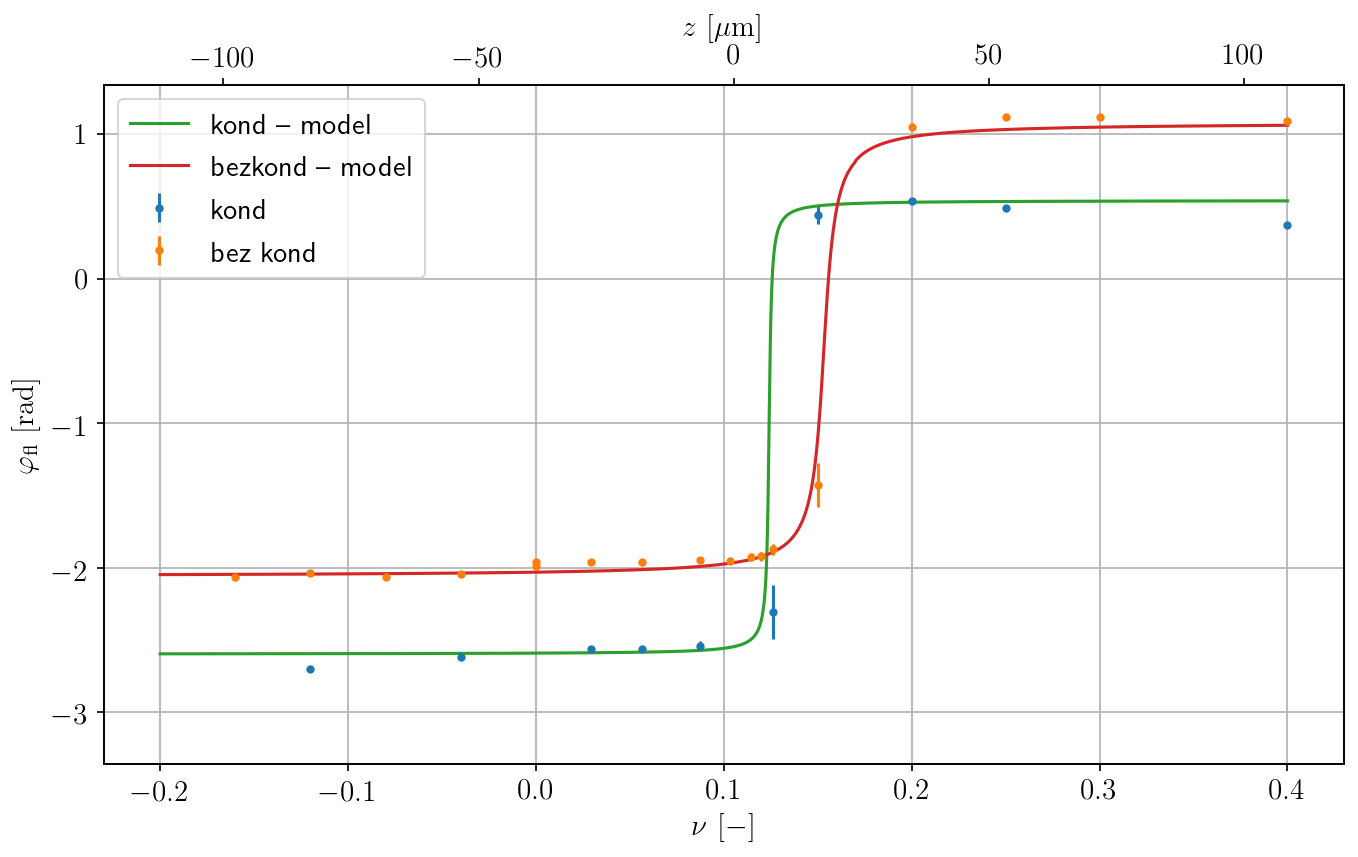

In [480]:
E_rf_phase_bezcond = np.unwrap( E_rf_asym_phase_nu(Vrf_bezcond, phi_bezcond, delta_z_ax,nu_range,
                                                   (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) ) - 2*np.pi
E_rf_phase_cond = np.unwrap( E_rf_asym_phase_nu(Vrf_cond, phi_cond, delta_z_ax,nu_range,
                                                (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) ) - 2*np.pi

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x = plt.gca()

x.errorbar(nu_cond, fot_phi_cond, yerr=fot_phi_cond_sigma, fmt='.', label=r'kond')
x.errorbar(nu_bezcond, fot_phi, yerr=fot_phi_sigma,  fmt='.', label=r'bez kond')
x.plot(nu_range, E_rf_phase_cond+0.55, label=r'kond -- model')
x.plot(nu_range, E_rf_phase_bezcond+1.1, label=r'bezkond -- model')

x2 = plt.twiny()

invisibleline = x2.plot(z_range, E_rf_phase_cond, alpha=0)

x.set_xlabel(r"$ \nu \, \, \rm [-]$")
x.set_ylabel(r"$ \varphi_{\rm fl} \, \, \rm [rad]$")
x2.set_xlabel(r"$z \, \, \rm [\mu m]$")

x.legend()
x.grid()

# save
# plt.savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/axial_MM_fit_faze.png", bbox_inches="tight")

vypada nafitovano celkem realisticky

dale zkusim pridat parametry, zkusim ruzne skalovani u obou dat, a taky zkusim nafitovat fazove posuvy

In [56]:
def fit_resid_E_amp_cond_bezcond_vice_param(x, nu_data_cond, nu_data_bezcond, E_amp_data_cond, E_amp_data_bezcond):
    # x = [Vrf_asym_cond, Vrf_asym_bezcond, delta_ax_sum , scale]
    
    # fixni parametry
    Vrf_5 = 31.5
    Vrf_6 = 31.5
    
    Vrf_cond = [x[0], x[0], Vrf_5, Vrf_6]
    
    Vrf_5 = 42.5
    Vrf_6 = 50.0
    Vrf_bezcond = [x[1], x[1], Vrf_5, Vrf_6]
    
    
    phi_2 = 0
    phi_56 = x[4]

#     phi_2 = x[5]
#     phi_56 = x[4]

    phi = np.array( [0, phi_2, phi_56] )
    
    delta_z_ax = [ x[2]/2, x[2]/2 ]
    
    resid_cond = E_rf_asym_amp_nu(Vrf_cond, phi, delta_z_ax, nu_data_cond, (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - x[3]*E_amp_data_cond
    resid_bezcond = E_rf_asym_amp_nu(Vrf_bezcond, phi, delta_z_ax, nu_data_bezcond, (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - x[3]*E_amp_data_bezcond
    
    return( np.concatenate((resid_cond, resid_bezcond)) )

In [57]:
# zkusim nafitovat faze pomoci dat o fazich
def fit_resid_E_phase_cond_bezcond(x, nu_data_cond, nu_data_bezcond, E_phase_data_cond, E_phase_data_bezcond):
    # x = [Vrf_asym_cond, Vrf_asym_bezcond, delta_ax_sum , scale]
    
    delta_z_ax = [ x[2]/2, x[2]/2 ]
    # fixni parametry
    Vrf_5 = 31.5
    Vrf_6 = 31.5
    
    Vrf_cond = [x[0], x[0], Vrf_5, Vrf_6]
    
    Vrf_5 = 42.5
    Vrf_6 = 50.0
    Vrf_bezcond = [x[1], x[1], Vrf_5, Vrf_6]
    
    
    

#     phi_2 = x[5]
#     phi_56 = x[4]
    phi_2 = 0
    phi_56 = x[3]
    phi = np.array( [0, phi_2, phi_56] )
    resid_cond = E_rf_asym_phase_nu(Vrf_cond, phi, delta_z_ax, nu_data_cond, (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_phase_data_cond + x[5]

    
    
    phi_56 = x[4]
    phi = np.array( [0, phi_2, phi_56] )
    resid_bezcond = E_rf_asym_phase_nu(Vrf_bezcond, phi, delta_z_ax, nu_data_bezcond, (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_phase_data_bezcond + x[6]
    
    return( np.concatenate((resid_cond, resid_bezcond)) )

In [58]:
from scipy.optimize import least_squares

# x0 = np.array( [200, 200, -200, 80, 0.1, 0.1] )
x0 = np.array( [300, 300, -200, 150, 0.3] )

# bbounds = ([150,150,-200, 1, 0, 0],[1000,1000,200, 100, 2*np.pi, 2*np.pi] )
bbounds = ([300,300,-200, 1, 0],[1000,1000,200, 200, 2*np.pi] )

# fit = least_squares(fit_resid_E_amp_cond_bezcond, x0, args=(nu_cond, nu_bezcond, E_rf_cond, E_rf) , ftol=1e-10, xtol=1e-10)
fit_amp = least_squares(fit_resid_E_amp_cond_bezcond_vice_param, x0, args=(nu_cond, nu_bezcond, E_rf_cond, E_rf) , ftol=1e-10, xtol=1e-10,
                   bounds=bbounds)
fit_amp.x
# fit

array([752.43179857, 498.30698447, -81.33582154,   3.94452402,
         5.97371278])

In [59]:
from scipy.optimize import least_squares

# x0 = np.array( [200, 200, -200, 80, 0.1, 0.1] )
x0 = np.array( [752.43179857,498.30698447,-81.33582154, 0.1, 0.1, 1.5, 2.2] )

# bbounds = ([150,150,-200, 1, 0, 0],[1000,1000,200, 100, 2*np.pi, 2*np.pi] )
bbounds = ([751.43179857,497.30698447,-81.33582154, 0, 0, 0,0],[752.43179857,498.30698447,-80.33582154, 0.5, 0.5,2*np.pi, 2*np.pi] )

# fit = least_squares(fit_resid_E_amp_cond_bezcond, x0, args=(nu_cond, nu_bezcond, E_rf_cond, E_rf) , ftol=1e-10, xtol=1e-10)
fit_phase = least_squares(fit_resid_E_phase_cond_bezcond, x0, args=(nu_cond, nu_bezcond, fot_phi_cond, fot_phi_sigma) , ftol=1e-10, xtol=1e-10,
                   bounds=bbounds)
fit_phase.x
fit_phase

 active_mask: array([-1, -1, -1,  1,  1, -1,  0])
        cost: 70.3837148718248
         fun: array([ 1.30284732, -0.43078584, -0.57081318, -0.65133706, -0.67625913,
        5.82003471,  5.7469553 , -0.56270304, -0.5411507 , -0.49443148,
       -1.49219682, -1.49162209, -1.45437927, -1.39920928, -1.28494352,
       -1.17385346, -1.05498348, -0.9721315 , -0.86032627, -0.17497715,
        1.025786  ,  1.24524763,  1.3273205 ,  1.39393094, -1.52427775,
       -1.54553992,  4.7235489 ,  4.7126067 ])
        grad: array([ 2.86579475e-03,  5.52271475e-03,  1.51115746e-01, -1.47904193e-01,
       -8.70928381e+00,  8.94235691e+00,  2.74903274e-07])
         jac: array([[ 2.33333659e-03,  0.00000000e+00,  1.95073066e-01,
        -1.20693728e-01, -0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 9.25710087e-05,  0.00000000e+00,  3.33141330e-04,
        -1.10320810e-01, -0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 1.30392314e-04,  0.00000000e+00,  9.820

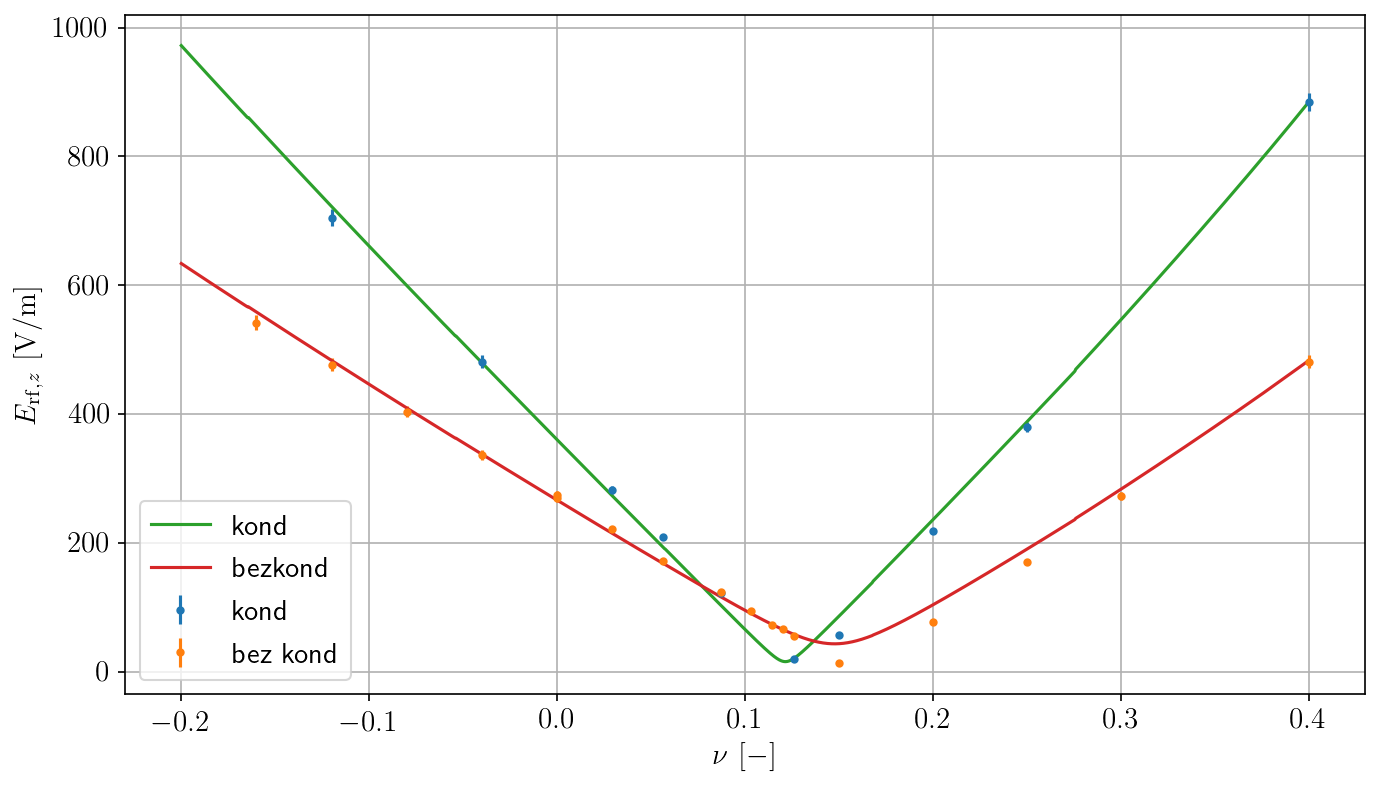

In [60]:
# napeti a faze na elektrodach pasti kond
Vrf_1 = fit_amp.x[0]
Vrf_3 = Vrf_1
Vrf_5 = 31.5
Vrf_6 = 31.5
Vrf_cond = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = fit_phase.x[3]

phi_cond = np.array( [0, phi_2, phi_56] )

delta_z_ax = [fit.x[2]/2, fit.x[2]/2]
# exper_data_scale = fit.x[3]
# exper_

nu_range = np.linspace(-0.2, 0.4, 2000)
E_rf_amp_cond = E_rf_asym_amp_nu(Vrf_cond, phi_cond, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )

# pro pripad bez kondiku
# napeti a faze na elektrodach pasti kond
Vrf_1 = fit_amp.x[1]
Vrf_3 = Vrf_1
Vrf_5 = 42.5
Vrf_6 = 50
Vrf_bezcond = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = fit_phase.x[4]

phi_bezcond = np.array( [0, phi_2, phi_56] )



# nu_range = np.linspace(-0.2, 0.4, 2000)
E_rf_amp_bezcond = E_rf_asym_amp_nu(Vrf_bezcond, phi_bezcond, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )


my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu_cond, fit_amp.x[3]*E_rf_cond, yerr=E_rf_cond_sigma, fmt='.', label=r'kond')
plt.errorbar(nu_bezcond, fit_amp.x[3]*E_rf, yerr=E_rf_sigma,  fmt='.', label=r'bez kond')
plt.plot(nu_range, E_rf_amp_cond, label=r'kond')
plt.plot(nu_range, E_rf_amp_bezcond, label=r'bezkond')

plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

plt.legend()
plt.grid()

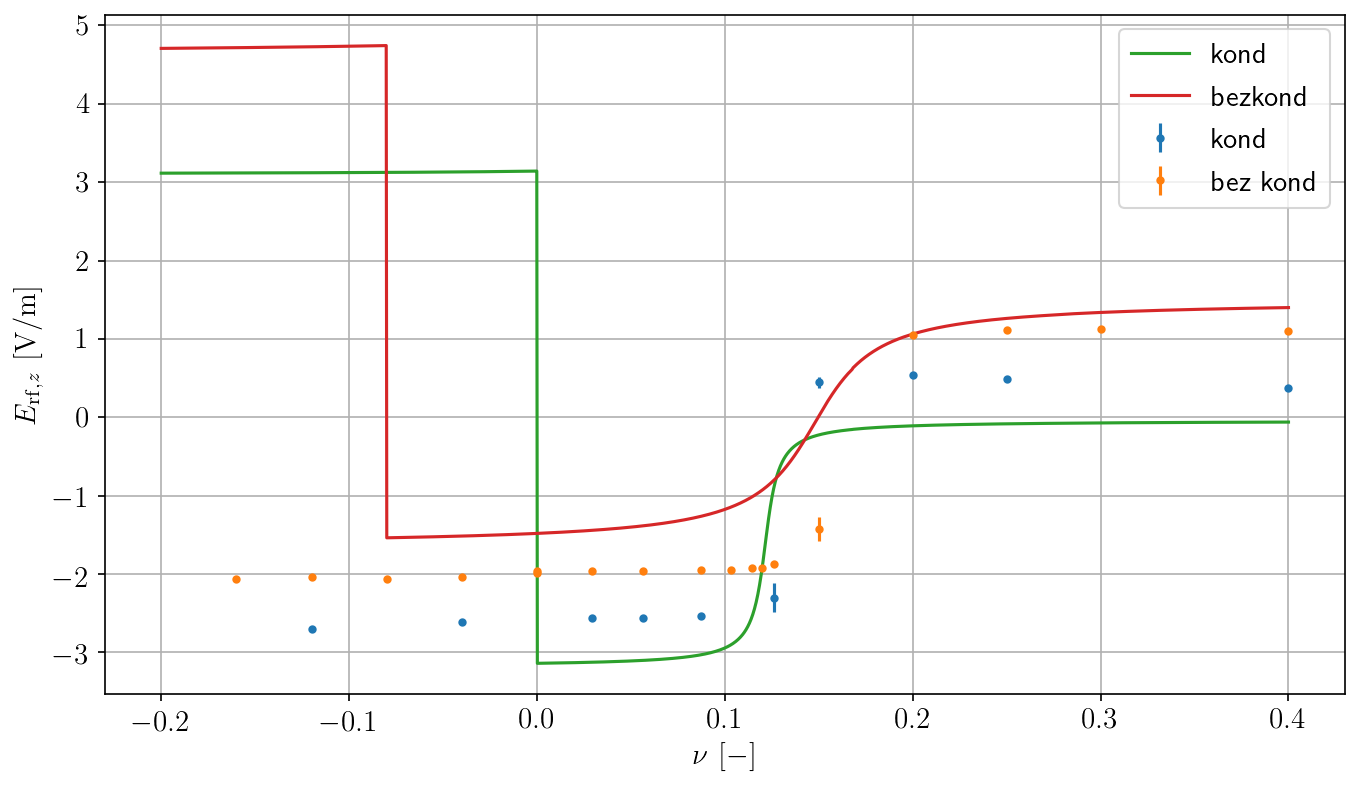

In [61]:
E_rf_phase_bezcond = E_rf_asym_phase_nu(Vrf_bezcond, phi_bezcond, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )
E_rf_phase_cond = E_rf_asym_phase_nu(Vrf_cond, phi_cond, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )

my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu_cond, fot_phi_cond, yerr=fot_phi_cond_sigma, fmt='.', label=r'kond')
plt.errorbar(nu_bezcond, fot_phi, yerr=fot_phi_sigma,  fmt='.', label=r'bez kond')
plt.plot(nu_range, E_rf_phase_cond+fit_phase.x[5], label=r'kond')
plt.plot(nu_range, E_rf_phase_bezcond+fit_phase.x[6], label=r'bezkond')

plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

plt.legend()
plt.grid()

## fitovani dat axialniho MM z 3.5.2020

In [481]:
# data import
#import pandas as pd
import numpy as np

#data_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_delim.txt", sep="\t").values
#voltages_bezcond = pd.read_csv("axial_EMM_10_03_2020_part1_voltages.txt", sep="\t").values

data_p1 = np.genfromtxt("03_05_20_EMM_min_z_step1_delim.txt", delimiter="\t")[:,:-1]
voltages_p1 = np.genfromtxt("03_05_20_EMM_min_z_step1_voltages.txt", delimiter="\t")
data_p2 = np.genfromtxt("03_05_20_EMM_min_z_step2_delim.txt", delimiter="\t")[:,:-1]
voltages_p2 = np.genfromtxt("03_05_20_EMM_min_z_step2_voltages.txt", delimiter="\t")
data_p3 = np.genfromtxt("03_05_20_EMM_min_z_step3_delim.txt", delimiter="\t")[:,:-1]
voltages_p3 = np.genfromtxt("03_05_20_EMM_min_z_step3_voltages.txt", delimiter="\t")
data_p4 = np.genfromtxt("03_05_20_EMM_min_z_step4_delim.txt", delimiter="\t")[:,:-1]
voltages_p4 = np.genfromtxt("03_05_20_EMM_min_z_step4_voltages.txt", delimiter="\t")
data_p5 = np.genfromtxt("03_05_20_EMM_min_z_final_delim.txt", delimiter="\t")[:,:-1]
voltages_p5 = np.genfromtxt("03_05_20_EMM_min_z_final_voltages.txt", delimiter="\t")

fotkor=np.concatenate( (data_p1 ,data_p2, data_p3, data_p4, data_p5) ,axis=1)
voltages=np.concatenate( (voltages_p1 ,voltages_p2, voltages_p3, voltages_p4, voltages_p5) ,axis=0)[:-1, :]

# pomocne promene
fotkor_shape = np.shape(fotkor)

# parametry odecitani foton-korelacnich dat
t_res = 256e-12  # casove rozliseni histogramu v s
t_measure = [90, 80, 100, 100, 95, 95, 95, 95, 95, 100, 100, 100, 100, 100] # doba nacitani dat v s
background_photocounts = [170, 170, 180, 170, 190, 190, 190, 190, 190, 180, 180, 180, 190, 190] # ph/s  tyto fotony jsou rovnomerne rozdeleny v prubehu RF periody

# celkovy pocet fotonu:
# photon_sum = np.sum(fotkor, axis=0) - t_measure * background_photocounts
photon_sum = np.sum(fotkor, axis=0) - np.array(t_measure) * np.array(background_photocounts)

hist_sigma = 0.09088658 * np.sqrt( photon_sum )
# casova skala foton-kor. dat
# t_scale = np.array( range(0,fotkor_shape[0]) ) *t_res

#------fit 
from EMM_min_func import get_hist_fit

DeltaS_S_ratio, Delta_S_S_ratio_sigma, fot_phi, fot_phi_sigma, x, Omega, Omega_sigma, nu, t_scale = get_hist_fit(fotkor, 
                                                                                                    voltages, t_res, t_measure, 
                                                                                                    background_photocounts, hist_sigma, 
                                                                                                       sign_DeltaS=False)


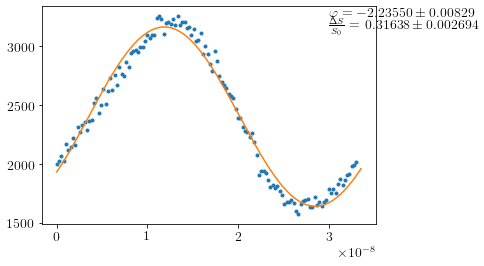

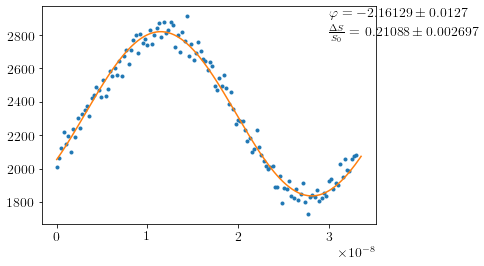

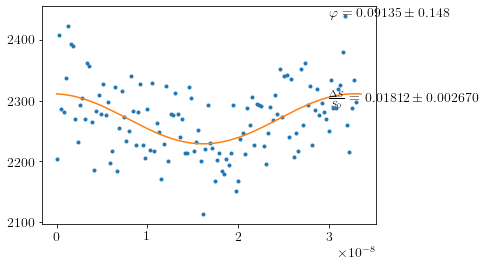

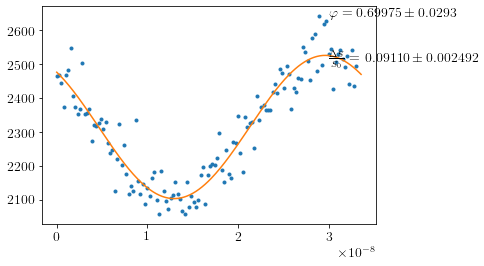

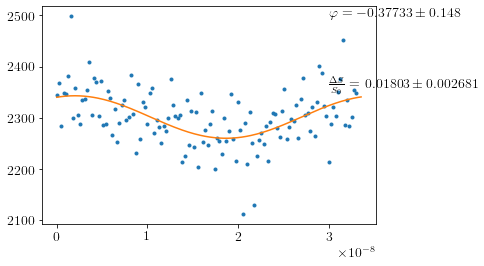

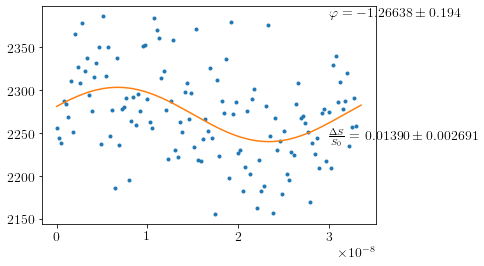

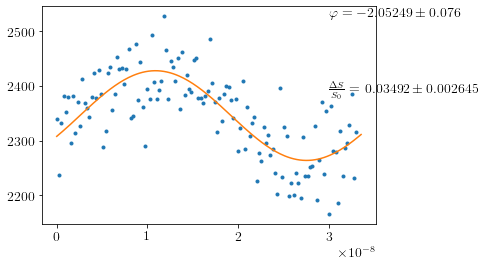

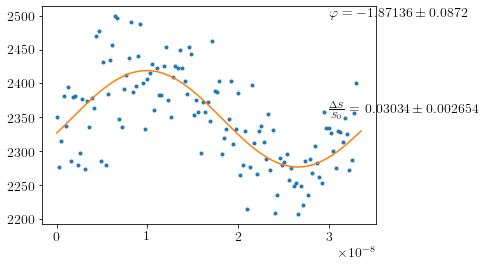

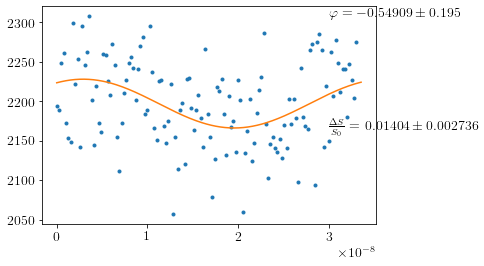

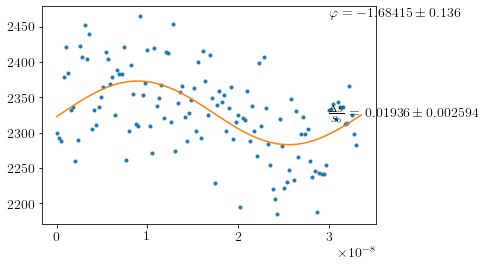

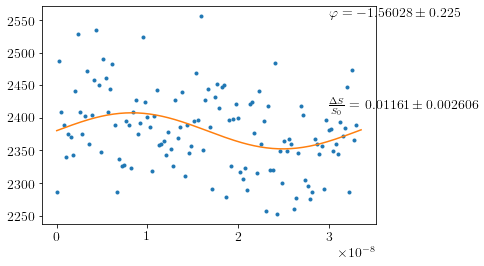

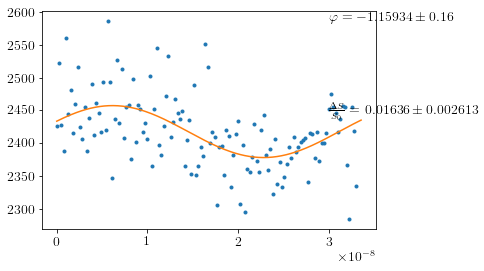

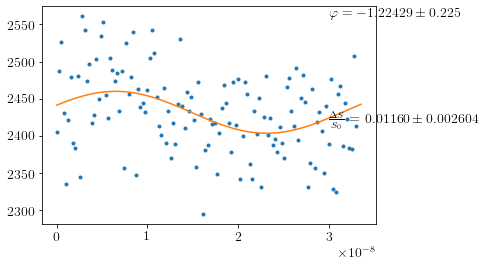

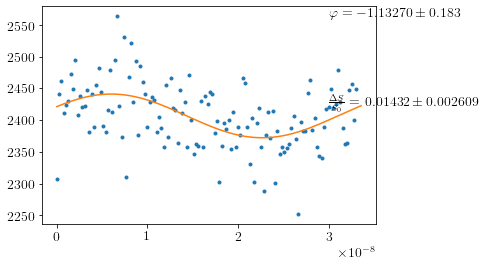

In [70]:
from EMM_min_func import get_hist_fit_values

# plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
# colors=('black', 'red')
for i in range(fotkor_shape[1]):
    time_fit, fotkor_fit = get_hist_fit_values(t_scale, x[:,i], Omega)

    plt.figure()
    plt.plot(t_scale[:fotkor_shape[0]-2],fotkor[:fotkor_shape[0]-2,i],'.')
    plt.plot(time_fit, fotkor_fit)
    text = r'$\frac{\Delta S}{S_0}  = \,\,$' + r'${:.5f} \pm {:.6f}$'.format(DeltaS_S_ratio[i], Delta_S_S_ratio_sigma[i])
    plt.text(3e-8, fotkor[:,i].max()-150,text) 
    text2 = r'$\varphi  = {:.5f} \pm {:.3}$'.format(fot_phi[i], fot_phi_sigma[i])
    plt.text(3e-8, fotkor[:,i].max(),text2) 

In [482]:
from scipy.optimize import approx_fprime, check_grad

def root_func(x):
    [beta, norm_mod_amp, Omega, laser_detun, decay_rate] = x
    return fl_signal(beta, laser_detun, Omega, decay_rate) - norm_mod_amp

def root_func_grad(x):
#     [beta, norm_mod_amp, Omega, laser_detun, decay_rate] = x
    epsilon = 5e-6
    return( approx_fprime(x, root_func, x*epsilon ) )

In [483]:
# ---- napocitam si i bety
from EMM_min_func import get_beta, fl_signal

# parametry vypoctu beta

decay_rate = 2*np.pi * 21.008e6  # decay rate dle tabulek NISTu
laser_detun = -31e6 * 2*np.pi  # detuning 
laser_detun_sigma = 4e6 * 2*np.pi # sigma detun

# get beta
beta = np.zeros(fotkor_shape[1])
beta_sigma = np.zeros(fotkor_shape[1])
for k in range(fotkor_shape[1]-1):
    beta[k] = get_beta(Omega, decay_rate, laser_detun, np.abs(DeltaS_S_ratio[k]) )
    
    # get sigma beta
    jacob_F = root_func_grad( np.array([beta[k], np.abs(DeltaS_S_ratio[k]), Omega, laser_detun, decay_rate]) ) 
    # [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]
    
    # variance-cov parametru
    Sigma_param = np.diag([Delta_S_S_ratio_sigma[k]**2, Omega_sigma**2, laser_detun_sigma**2])
    
    beta_sigma[k] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )

beta[-1] = get_beta(Omega, decay_rate, -32e6 * 2*np.pi, np.abs(DeltaS_S_ratio[-1]) )

# get sigma beta
jacob_F = root_func_grad( np.array([beta[-1], np.abs(DeltaS_S_ratio[-1]), Omega, -32e6 * 2*np.pi, decay_rate]) ) 
# [dF/dbeta, dF/ddeltaS/S, dF/dOmega, dF/dDelta, dF/dGamma]

# variance-cov parametru
Sigma_param = np.diag([Delta_S_S_ratio_sigma[-1]**2, Omega_sigma**2, laser_detun_sigma**2])

beta_sigma[-1] = np.sqrt( jacob_F[0]**-2 * jacob_F[1:-1] @ Sigma_param @ np.transpose( jacob_F[1:-1] ) )
    

In [484]:
# dalsi parametry
m = 40 * 1.66053904e-27 # calcium mass
k_vec = 2*np.pi * 1/(397e-9) # wave vector
e = 1.60217662e-19 # elem charge

# get E-fields
E_rf = (m*Omega**2 / (k_vec*e)) * beta
E_rf_sigma = np.sqrt( (beta_sigma*m*Omega**2 / (k_vec*e))**2 + (2*m*Omega / (k_vec*e) * beta * Omega_sigma)**2  ) # propagase chyb


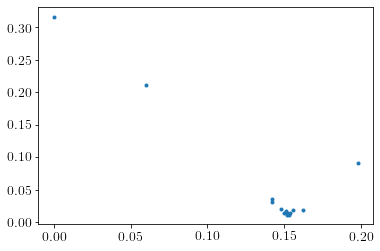

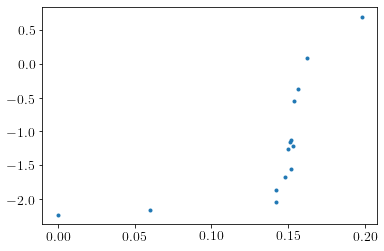

In [354]:
plt.plot(nu, DeltaS_S_ratio, '.')
plt.figure()
plt.plot(nu, fot_phi, '.')

In [485]:
## nacteni dat ze souboru
# pole generovano axialni elektrodou v + 2.25mm
z_data = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,1]
E_field_ax_data = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,2]
E_field_rad_data_par = np.genfromtxt("axial_field_unitary_rad_ax_delim.txt")[:,3]
E_field_rad_data_jedna = E_field_rad_data_par/2 # pole generovane jednou radialni elektrodou na ose z je polovicni oproti poli
# E_field_rad_data_jedna = E_field_rad_data_par         # ve vypoctu se mi nekde objevil faktor 4                                      
    
leng_data = len(z_data)

from scipy import interpolate

# definice interpolacnich fci
E_field_ax_6 = interpolate.interp1d(z_data*1e3, E_field_ax_data, kind='quadratic')
E_field_ax_5 = interpolate.interp1d(z_data*1e3, -1*E_field_ax_data[::-1], kind='quadratic')
E_field_rad_jedna = interpolate.interp1d(z_data*1e3, E_field_rad_data_jedna, kind='quadratic')


In [486]:
### prepocet nu na z funkce:
def get_z_given_nu(nu, delta_z_ax):
    # funkce vraci axialni polohu iontu 
    # input: nu, [delta_z_ax_5, delta_z_ax_6]
    a = 0.000357087248516796 *1e6
    b = 0.0000614272209845667 *1e6
    c = 0.000214572720416111 *1e6
    
    return( a* nu + b* nu**3 + c *nu**5 + sum(delta_z_ax) * 0.5 )

# funkce vracejici amplitudu rf pole v zavislosti na nu a na ostatnich parametrech
def E_rf_asym_amp_nu(Vrf, phi, delta_z_ax, nu, f_interp):
    # Vrf = [Vrf_1, Vrf_3, Vrf_5, Vrf_6] # defaultne mam Vrf24 = 0 => asym drive
    # phi = [phi_1 = 0, phi_2, phi_56]  # phi_1 = 0 -- volba, dale pak phi_5=phi_6
    # delta_z_ax - [vychyleni ax_5, vychyleni ax_6]
    # nu = [] body, ve kterych chci fci vyhodnotit
    # f_interp = (E_field_rad, E_field_ax5, E_field_ax6) 
    
    # out: amplituda E_pole
    
    rad_amp = sum( Vrf[0:2] * np.exp(phi[0:2] * 1j ) )
    ax_5_amp = Vrf[2] * np.exp(phi[2] * 1j )
    ax_6_amp = Vrf[3] * np.exp(phi[2] * 1j )
    
    z = get_z_given_nu(nu, delta_z_ax)
    E_rf_complex = rad_amp * f_interp[0](z) + ax_5_amp * f_interp[1](z - delta_z_ax[0]) + ax_6_amp * f_interp[2](z - delta_z_ax[1])

    # amplituda a faze
    return np.abs(E_rf_complex)

# funkce vracejici fazi rf pole v zavislosti na nu a na ostatnich parametrech
def E_rf_asym_phase_nu(Vrf, phi, delta_z_ax, nu, f_interp):
    # Vrf = [Vrf_1, Vrf_3, Vrf_5, Vrf_6] # defaultne mam Vrf24 = 0 => asym drive
    # phi = [phi_1 = 0, phi_2, phi_56]  # phi_1 = 0 -- volba, dale pak phi_5=phi_6
    # delta_z_ax - [vychyleni ax_5, vychyleni ax_6]
    # nu = [] body, ve kterych chci fci vyhodnotit
    # f_interp = (E_field_rad, E_field_ax5, E_field_ax6) 
    
    # out: amplituda E_pole
    
    rad_amp = sum( Vrf[0:2] * np.exp(phi[0:2] * 1j ) )
    ax_5_amp = Vrf[2] * np.exp(phi[2] * 1j )
    ax_6_amp = Vrf[3] * np.exp(phi[2] * 1j )
    
    z = get_z_given_nu(nu, delta_z_ax)
    E_rf_complex = rad_amp * f_interp[0](z) + ax_5_amp * f_interp[1](z - delta_z_ax[0]) + ax_6_amp * f_interp[2](z - delta_z_ax[1])

    # amplituda a faze
    return np.angle( E_rf_complex )

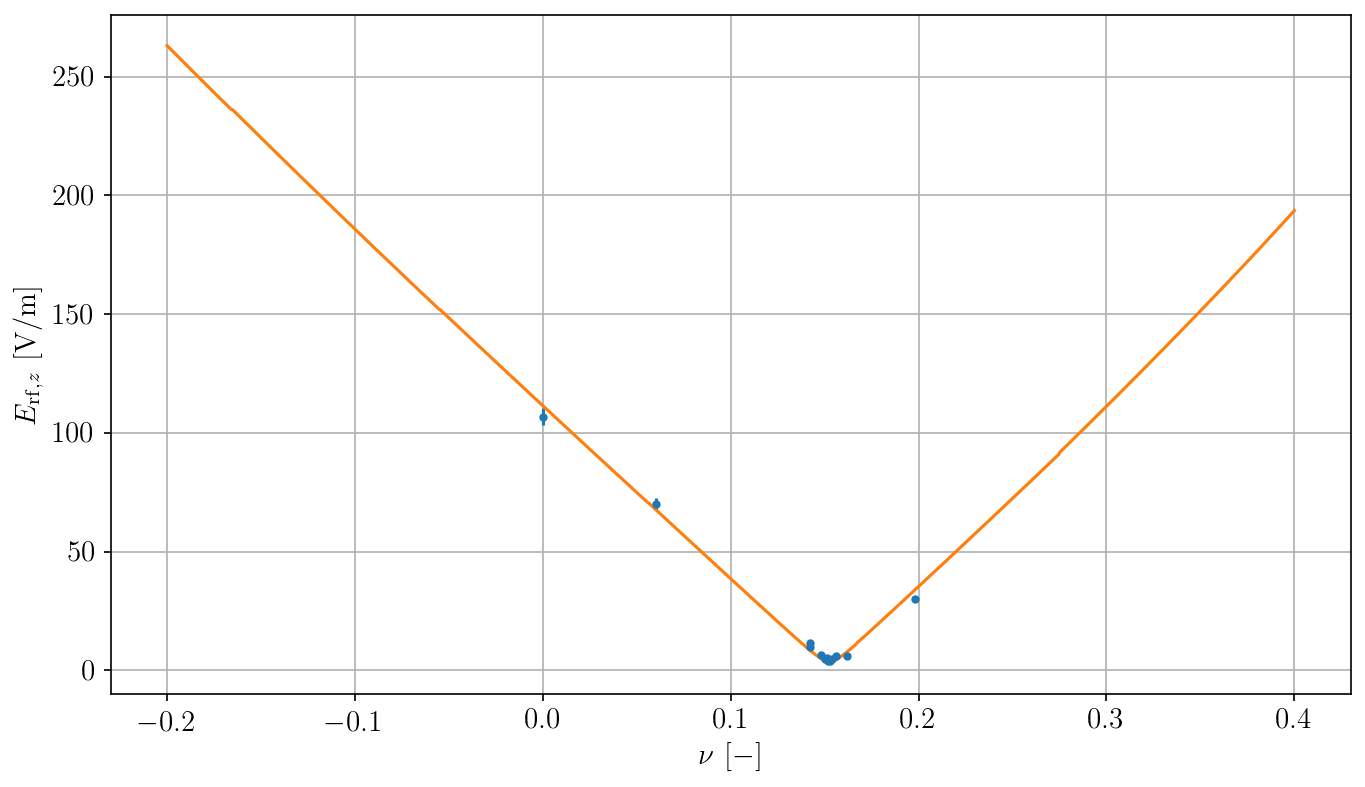

In [361]:
# napeti a faze na elektrodach pasti
Vrf_1 = 209
Vrf_3 = 209
Vrf_5 = 17
Vrf_6 = 20
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = 0.1

phi = np.array( [0, phi_2, phi_56] )

delta_z_ax = [-40, -40]
# delta_z_ax = [0, 0]
exper_data_scale = 1

nu_range = np.linspace(-0.2, 0.4, 1000)
E_rf_amp = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )


my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu, exper_data_scale*E_rf, yerr= exper_data_scale*E_rf_sigma, fmt='.')
# plt.errorbar(nu_bezcond, E_rf, yerr=E_rf_sigma,  fmt='o', label=r'bez kond')
plt.plot(nu_range, E_rf_amp)

plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

# plt.legend()
plt.grid()

In [487]:
def fit_resid_E_amp(x, nu_data, E_amp_data):
    # x = [Vrf_asym, delta_x_ax_sum ]
    
    
#     Vrf_5 = 42.5 
#     Vrf_6 = 50 
#     Vrf_5 = 17
#     Vrf_6 = 20
    Vrf_5 = 0.84*x[2]
    Vrf_6 = x[2]
    
    Vrf = [x[0], x[0], Vrf_5, Vrf_6]
    
    # fixni parametry
    phi_2 = 0
    phi_56 = x[1]

    phi = np.array( [0, phi_2, phi_56] )
    
    delta_z_ax = [x[3]/2, x[3]/2]
#     delta_z_ax = [-65.11076802/2, -65.11076802/2]

#     delta_z_ax = [-80.84254716/2, -80.84254716/2]
    
    return( E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_data,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) - E_amp_data )

zkusim nafitovat ziskanou zavislost s tim, ze vychylky axialnich elektrod pokladam za jiz zname z mereni z brezna

In [494]:
from scipy.optimize import least_squares

# Vrf_5 = 1
# x0 = np.array( [200, 0.1, 1] )
x0 = np.array( [500, 0.4, 1, -50] )

# bbounds = ([150,150,-200, 1, 0, 0],[1000,1000,200, 100, 2*np.pi, 2*np.pi] )
# bbounds = ([150, 0, 0],[900, 2*np.pi, 100] )
bbounds = ([150, 0, 0, -200],[900, 2*np.pi, 100, 200] )

# fit = least_squares(fit_resid_E_amp_cond_bezcond, x0, args=(nu_cond, nu_bezcond, E_rf_cond, E_rf) , ftol=1e-10, xtol=1e-10)
fit = least_squares(fit_resid_E_amp, x0, args=(nu, E_rf) , ftol=1e-10, xtol=1e-10,
                   bounds=bbounds)
fit

 active_mask: array([0, 0, 0, 0])
        cost: 10.256363728331445
         fun: array([ 1.80642327e+00, -3.05441737e+00, -3.43260227e-04,  1.95054561e-01,
       -1.86327666e+00,  1.14358523e+00, -1.02531246e+00,  4.75178649e-01,
       -3.79307945e-01,  4.12352874e-01,  1.01082264e+00, -1.28194151e-01,
        6.73853784e-01,  1.38631198e-01])
        grad: array([ 3.07839116e-05,  3.03091614e-05,  3.53390516e-05, -2.69941984e-05])
         jac: array([[ 4.88087284e-01, -1.25989819e+00,  6.62543011e-01,
        -1.17961124e+00],
       [ 2.33862297e-01, -1.66957855e+00,  1.13069179e+00,
        -1.17018978e+00],
       [ 1.43355948e-01,  2.76070025e+01, -1.22508599e+00,
         8.32966927e-01],
       [ 3.51901147e-01,  1.11769693e+01, -2.15798207e+00,
         1.15523675e+00],
       [ 2.80625442e-03,  3.44880849e+01,  1.90533697e-01,
         1.87086955e-02],
       [-1.07696378e-01,  2.03382588e+01,  1.47558843e+00,
        -8.41852215e-01],
       [-1.06951674e-01,  8.28221083e+

vypada to, ze zalezi pouze na pomeru oscilujicich potencialu na axialnich elektrodach -- jdu to overit.
zjistuju, ze neni pravda :

dalsi napad, zalezi na pomeru rozdilu napeti na axialnich ku napeti na radialnich

nedari se najit zavislost

In [444]:
fit.x[0]* fit.x[1]

21.90525368778071

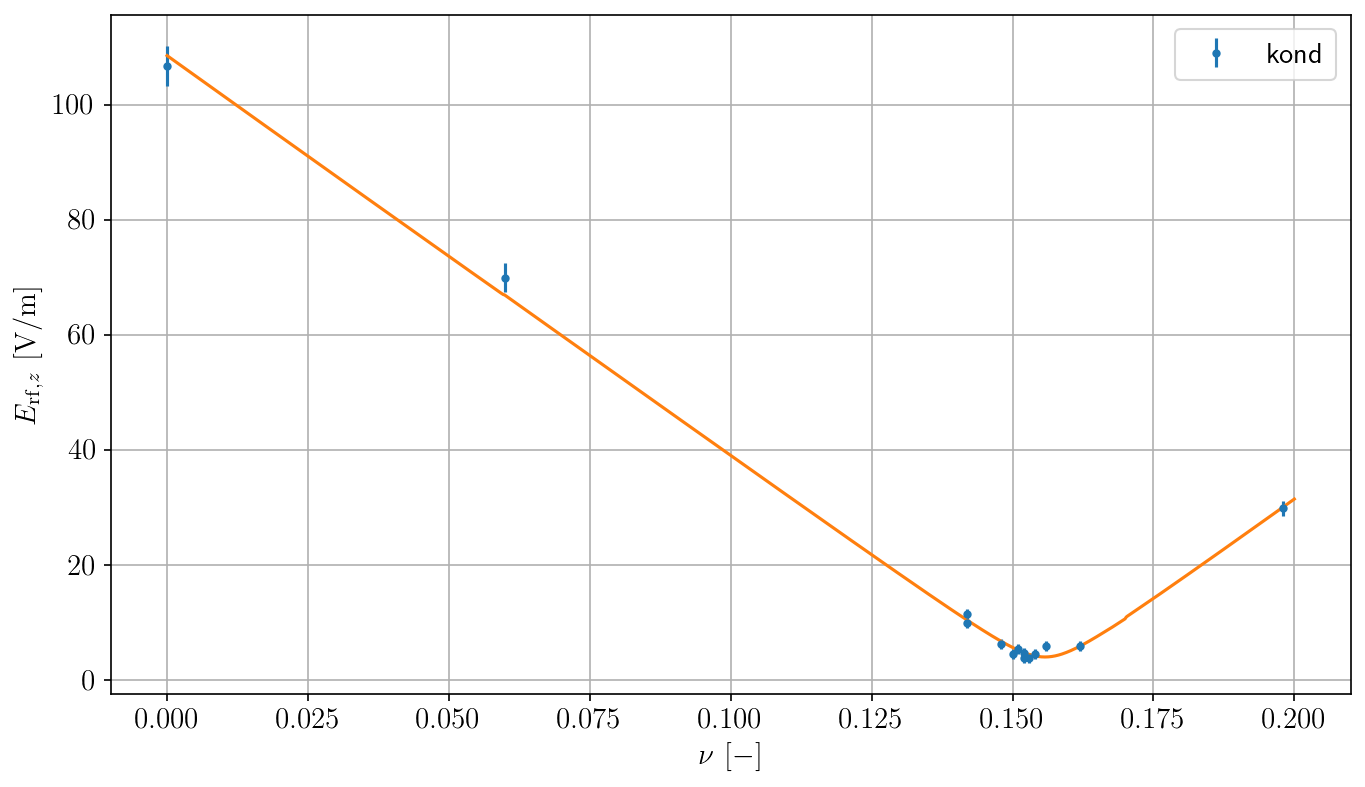

In [491]:
# napeti a faze na elektrodach pasti
Vrf_1 = fit.x[0]
Vrf_3 = fit.x[0]
# Vrf_5 = 17 
# Vrf_6 = 20 
Vrf_5 = 0.84*fit.x[2]
Vrf_6 = fit.x[2]
Vrf = np.array( [Vrf_1, Vrf_3, Vrf_5, Vrf_6] )

phi_2 = 0
phi_56 = fit.x[1]

phi = np.array( [0, phi_2, phi_56] )

delta_z_ax = [fit.x[3]/2, fit.x[3]/2]
# delta_z_ax = [-40, -40]
# delta_z_ax = [-80.84254716/2, -80.84254716/2]
# delta_z_ax = [-65.11076802/2, -65.11076802/2]
# exper_data_scale = fit.x[2]
exper_data_scale = 1

nu_range = np.linspace(0, 0.2, 1000)
E_rf_amp = E_rf_asym_amp_nu(Vrf, phi, delta_z_ax,nu_range,(E_field_rad_jedna , E_field_ax_5, E_field_ax_6) )


my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
plt.errorbar(nu, exper_data_scale* E_rf, yerr= exper_data_scale*E_rf_sigma, fmt='.', label=r'kond')
# plt.errorbar(nu_bezcond, E_rf, yerr=E_rf_sigma,  fmt='o', label=r'bez kond')
plt.plot(nu_range, E_rf_amp)

plt.xlabel(r"$ \nu \, \, \rm [-]$")
plt.ylabel(r"$ E_{\rm rf, \it z} \, \, \rm [V/m]$")

plt.legend()
plt.grid()

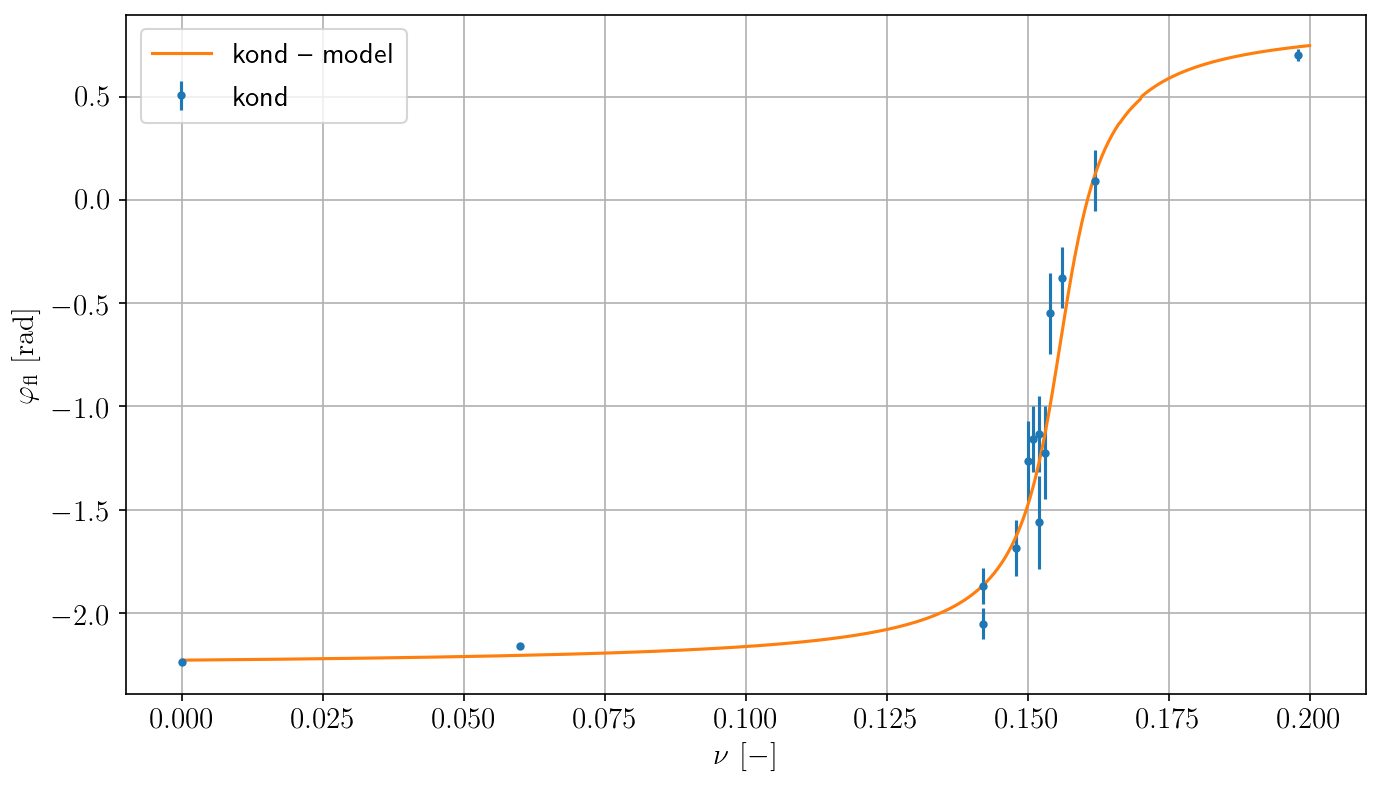

In [492]:
E_rf_phase = np.unwrap( E_rf_asym_phase_nu(Vrf, phi, delta_z_ax,nu_range,
                                                   (E_field_rad_jedna , E_field_ax_5, E_field_ax_6) ) ) 


my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

plt.figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)

x = plt.gca()

x.errorbar(nu, fot_phi, yerr=fot_phi_sigma, fmt='.', label=r'kond')
x.plot(nu_range, E_rf_phase+0.90, label=r'kond -- model')


x.set_xlabel(r"$ \nu \, \, \rm [-]$")
x.set_ylabel(r"$ \varphi_{\rm fl} \, \, \rm [rad]$")

x.legend()
x.grid()